# Grain and Tiller Counter
author: Yuki Yamagishi(yamagishi-yuki008@g.ecc.u-tokyo.ac.jp)

ver0.1(13.01.2025) :initial release


# 1.Package install and restart runtime **

In [1]:
!pip install hdf5storage
!pip install tensorboardX
!pip install Pillow==9.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


# 2.Package import and Connect Google Drive **

## 2-1.Import torch and PIL

In [1]:
!python3 --version
import torch; print("torch=",torch.__version__)
import torchvision; print("torchvision=",torchvision.__version__)
import PIL; print("Pillow=",PIL.__version__)

Python 3.11.12
torch= 2.6.0+cu124
torchvision= 0.21.0+cu124
Pillow= 9.5.0


## 2-2.Connect Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


# 3.Parameter Setting and Configuration **

In [35]:
###Set Counting Target###

Analysis_List = ["tiller","grain","fertile_or_sterile","panicle","tiller_with_inference_key_point"]

#analysis_target = Analysis_List[0]#Tiller Analysis
analysis_target = Analysis_List[1]#Grain Analysis(Water Selection Method)
#analysis_target = Analysis_List[2] #Grain Analysis(Thick or Flat)
#analysis_target = Analysis_List[3]#Panicle Analysis
#analysis_target = Analysis_List[4]#tiller_with_inference_key_point

#####Execution Configuration#####
if analysis_target =="tiller":
  Data_Distribution_Flag = False                        #If True: Data Distribution of Training /  Evaluation / Testing will be executed, with eliminating existing file.
  Training_Patch_Gen_Flag = False                       #If True: Data generation for patch images will be executed, with eliminating existing file.
  Inference_Patch_Gen_Flag = True                      #If True: Data generation for patch images will be executed, with eliminating existing file.

  Training_Flag =  False                                #If True: Training process will be executed, with updating previous deep learning model.
  training_from_previous_model = False                  #If True: Succeed current exitsing model.

  Inference_Flag = True                                 #If True: Inference process will be executed, with eliminating existing file.
  Inference_DoubleCount_Elimination_Flag = False        #If True: Double counting will be eliminated.

  Shrink_Flag = False                                   #If True: Width of image file will be set same to smaller image.
  Plot_GT_in_Inference_Img_Flag = False                 #If True: Ground Truth point will be drawn in inference output.(it will take longer processing time)

#####種籾観測の条件#####
if analysis_target =="grain":
  Data_Distribution_Flag = False                        #If True: Data Distribution of Training /  Evaluation / Testing will be executed, with eliminating existing file.
  Training_Patch_Gen_Flag = False                       #If True: Data generation for patch images will be executed, with eliminating existing file.
  Inference_Patch_Gen_Flag = False                      #If True: Data generation for patch images will be executed, with eliminating existing file.

  Training_Flag =  False                                #If True: Training process will be executed, with updating previous deep learning model.
  training_from_previous_model = False                  #If True: Succeed current exitsing model.

  Inference_Flag = True                                 #If True: Inference process will be executed, with eliminating existing file.
  Inference_DoubleCount_Elimination_Flag = True         #If True: Double counting will be eliminated.

  Shrink_Flag = False                                   #If True: Width of image file will be set same to smaller image.
  Plot_GT_in_Inference_Img_Flag = True                  #If True: Ground Truth point will be drawn in inference output.(it will take longer processing time)



#####種籾観測の条件#####
if analysis_target =="fertile_or_sterile":
  Data_Distribution_Flag = False                        #If True: Data Distribution of Training /  Evaluation / Testing will be executed, with eliminating existing file.
  Training_Patch_Gen_Flag = False                       #If True: Data generation for patch images will be executed, with eliminating existing file.
  Inference_Patch_Gen_Flag = False                      #If True: Data generation for patch images will be executed, with eliminating existing file.

  Training_Flag =  False                                #If True: Training process will be executed, with updating previous deep learning model.
  training_from_previous_model = True                   #If True: Succeed current exitsing model.

  Inference_Flag = True                                 #If True: Inference process will be executed, with eliminating existing file.
  Inference_DoubleCount_Elimination_Flag = True         #If True: Double counting will be eliminated.

  Shrink_Flag = True                                    #If True: Width of image file will be set same to smaller image.
  Plot_GT_in_Inference_Img_Flag = True                  #If True: Ground Truth point will be drawn in inference output.(it will take longer processing time)


  #####種籾観測の条件#####
if analysis_target =="tiller_with_inference_key_point":
  Data_Distribution_Flag = False                        #If True: Data Distribution of Training /  Evaluation / Testing will be executed, with eliminating existing file.
  Training_Patch_Gen_Flag = False                       #If True: Data generation for patch images will be executed, with eliminating existing file.
  Inference_Patch_Gen_Flag = True                      #If True: Data generation for patch images will be executed, with eliminating existing file.

  Training_Flag =  False                                #If True: Training process will be executed, with updating previous deep learning model.
  training_from_previous_model = False                  #If True: Succeed current exitsing model.

  Inference_Flag = True                                 #If True: Inference process will be executed, with eliminating existing file.
  Inference_DoubleCount_Elimination_Flag = False        #If True: Double counting will be eliminated.

  Shrink_Flag = False                                   #If True: Width of image file will be set same to smaller image.
  Plot_GT_in_Inference_Img_Flag = True                 #If True: Ground Truth point will be drawn in inference output.(it will take longer processing time)

In [36]:
### Label Translation form Annotation data###


if analysis_target =="tiller":
  label_dict = {'LT1': 1, 'LT2': 1, 'LT3': 1, 'LT4': 1} # Converted all data into Class Label 1
  unique_label_dict = {'LT1': 1, 'LT2': 1, 'LT3': 1, 'LT4': 1}
  label_type_count = 1 + 1 #Please fill Class type count + 1

elif analysis_target =="grain":
  label_dict = {'Fill': 1, '平べったいけど沈む': 1, '平べったくて浮く': 2, '詰まっているけど浮く': 2, 'Unfill': 2} # Converted Sinked grain into Label 1, and Floated grain into Label 2
  unique_label_dict = {'Fill': 1, '平べったいけど沈む': 2, '平べったくて浮く': 3, '詰まっているけど浮く': 4, 'Unfill': 5}
  label_type_count = 2 + 1 #Please fill Class type count + 1

elif analysis_target =="fertile_or_sterile":
  label_dict = {'Fill': 1, '平べったいけど沈む': 2, '平べったくて浮く': 2, '詰まっているけど浮く': 1, 'Unfill': -1}   # Converted Fertile grain into Label 1, and Sterile grain into Label 2. Unknown data is categorized into Label -1, and not used for analysis
  unique_label_dict = {'Fill': 1, '平べったいけど沈む': 2, '平べったくて浮く': 3, '詰まっているけど浮く': 4, 'Unfill': 5}
  label_type_count = 2 + 1 #Please fill Class type count + 1

elif analysis_target =="panicle": #not analyzed yet.
  label_dict = {'XXX': 1}
  label_type_count = 2

elif analysis_target == "tiller_with_inference_key_point":
  label_dict = {'LT1': 1, 'LT2': 1, 'LT3': 1, 'LT4': 1} # Converted all data into Class Label 1
  unique_label_dict = {'LT1': 1, 'LT2': 2, 'LT3': 3, 'LT4': 4}
  label_type_count = 1 + 1 #Please fill Class type count + 1


### Directory Setting ###

if analysis_target =="tiller":
  training_data_root_dir      = "/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/" # Directory to locate analyzed data.
  training_data_root_dir2     = "/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/" # Directory to locate raw data and copied to root_dir
  program_files_root_dir      = "/content/drive/MyDrive/research/tanashi2022/stemCounting/programs/"     # Directory to locate referenced program files and deep learning model(.pth)
  best_model_file             = program_files_root_dir + "CrowdCounting-P2PNet/MultiLevelPyramidFeature_01/best_mae_all_data.pth" # Folder of deep learning model.
  trimming_size               = 224 # Image trimming size for deep learning.
  training_data_ratio         = 0.57  #Training vs validation = 4:3
  validation_data_ratio       = 1.0 - training_data_ratio
  training_set_root_data_list = ["0704","0714","0801"] #folder name below training root data
  padding_size                = 0 #image padding
  learning_rate               = 1e-3 #learning rate for backgrond modelss
  learning_rate_2             = 1e-5 #learning rate for detection head

  PROX_ELIMINATION_DISTANCE   = -1
  PROX_ELIMINATION_DISTANCE2  = -1
  PROX_DISTINCT_DISTANCE     = 41

  INFERENCE_THRESHOLD         = 0.5

elif analysis_target =="grain":
  training_data_root_dir      = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/"
  training_data_root_dir2     = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData/"
  program_files_root_dir      = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/programs/"
  best_model_file             = program_files_root_dir + "CrowdCounting-P2PNet/MultiLevelPyramidFeature_01/best_mae.pth"
  trimming_size               = 256
  padding_size                = 0
  learning_rate               = 1e-3 #learning rate for backgrond model
  learning_rate_2             = 1e-4 #learning rate for detection head

  training_set_root_data_list = ["root data"]
  training_data_ratio         = 0.2426
  validation_data_ratio       = 0.0221
  inference_data_ratio        = 0.7353

  PROX_ELIMINATION_DISTANCE   = 31
  PROX_ELIMINATION_DISTANCE2  = 25 ###この数値が31ではまずいのか、後日確認
  PROX_DISTINCT_DISTANCE     = 31

  INFERENCE_THRESHOLD         = 0.3


#  training_set_root_data_list = ["used_for_train_or_eval"]
#  training_data_ratio         = 0.93333
#  validation_data_ratio       = 0.06667
#  inference_data_ratio        = 0.0

#  training_set_root_data_list = ["train_only"]
#  training_data_ratio         = 1.00
#  validation_data_ratio       = 0.00
#  inference_data_ratio        = 0.0

#  training_set_root_data_list = ["eval_only"]
#  training_data_ratio         = 0.00
#  validation_data_ratio       = 1.00
#  inference_data_ratio        = 0.0



elif analysis_target =="fertile_or_sterile":
  training_data_root_dir      = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_for_Fertile_Sterile/"
  training_data_root_dir2     = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_for_Fertile_Sterile/"
  program_files_root_dir      = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/programs/"
  best_model_file             = program_files_root_dir + "CrowdCounting-P2PNet/MultiLevelPyramidFeature_01/best_mae_fertile_or_sterile.pth"
  trimming_size               = 256
  padding_size                = 0
  learning_rate               = 1e-7
  learning_rate_2             = 1e-3

  PROX_ELIMINATION_DISTANCE   = 31
  PROX_ELIMINATION_DISTANCE2  = 25 ###この数値が31ではまずいのか、後日確認
  PROX_DISTINCT_DISTANCE      = 31

  INFERENCE_THRESHOLD         = 0.3

#  training_set_root_data_list = ["used_for_train_or_eval_or_inference"]
#  training_data_ratio         = 0.2100
#  validation_data_ratio       = 0.0900
#  inference_data_ratio        = 0.7000


#  training_set_root_data_list = ["used_for_train_or_eval"]
#  training_data_ratio         = 0.7000
#  validation_data_ratio       = 0.3000
#  inference_data_ratio        = 0.0

#  training_set_root_data_list = ["train_only"]
#  training_data_ratio         = 0.7000
#  validation_data_ratio       = 0.3000
#  inference_data_ratio        = 0.0

#  training_set_root_data_list = ["eval_only"]
#  training_data_ratio         = 0.7000
#  validation_data_ratio       = 0.3000
#  inference_data_ratio        = 0.0



elif analysis_target =="panicle":
  training_data_root_dir        = "/content/drive/MyDrive/research/tanashi2022/XXXX/AnalysisData/"
  training_data_root_dir2       = "/content/drive/MyDrive/research/tanashi2022/XXXX/AnalysisData/"
  program_files_root_dir        = "/content/drive/MyDrive/research/tanashi2022/XXXX/programs/"




elif analysis_target == "tiller_with_inference_key_point":
  training_data_root_dir      = "/content/drive/MyDrive/research/tanashi2022/stemCountingForAnnotationComparison/AnalysisData/" # Directory to locate analyzed data.
  training_data_root_dir2     = "/content/drive/MyDrive/research/tanashi2022/stemCountingForAnnotationComparison/AnalysisData/" # Directory to locate raw data and copied to root_dir
  program_files_root_dir      = "/content/drive/MyDrive/research/tanashi2022/stemCounting/programs/"     # Directory to locate referenced program files and deep learning model(.pth)
  best_model_file             = program_files_root_dir + "CrowdCounting-P2PNet/MultiLevelPyramidFeature_01/best_mae_all_data.pth" # Folder of deep learning model.
  trimming_size               = 224 # Image trimming size for deep learning.
  training_data_ratio         = 0.57  #Training vs validation = 4:3
  validation_data_ratio       = 1.0 - training_data_ratio
  training_set_root_data_list = ["0704","0714","0801"] #folder name below training root data
  padding_size                = 0 #image padding
  learning_rate               = 1e-3 #learning rate for backgrond modelss
  learning_rate_2             = 1e-5 #learning rate for detection head

  PROX_ELIMINATION_DISTANCE   = -1
  PROX_ELIMINATION_DISTANCE2  = -1
  PROX_DISTINCT_DISTANCE      = 41

  INFERENCE_THRESHOLD         = 0.5


####下記フォルダに、学習させたい画像と、Annotationデータをセットで配置します

training_set_root_data_dir                          = training_data_root_dir2 + "SetRootData/"#こちらの各ディレクトリにjsonと画像ファイルを配置する





training_data_images_dir_before_trimming            = training_data_root_dir + "images/ImageBeforeTrimming/" #こちらに画像を配置する
evaluation_data_images_dir_before_trimming          = training_data_root_dir + "evaluation/ImageBeforeTrimming/" #こちらに画像を配置する
inference_input_path_before_trimming                = training_data_root_dir + "inference/Input/image_before_trimming" #こちらに画像を配置する

training_data_training_label_dir                    = training_data_root_dir + "labels_Training" #こちらにjsonファイルを配置する
training_data_evaluation_label_dir                  = training_data_root_dir + "labels_Evaluation" #こちらにjsonファイルを配置する



####学習用パッチ画像を生成すると更新される
training_data_images_dir                            = training_data_root_dir + "images/" #こちらにパッチ画像が生成される
evaluation_data_images_dir                          = training_data_root_dir + "evaluation/" #こちらにパッチ画像が生成される

training_data_label_dir_before_trimming             = training_data_root_dir + "labels_Training/only_coordinate/ImageBeforeTrimming/" #こちらにjsonを変換したtxtが生成される
evaluation_data_label_dir_before_trimming           = training_data_root_dir + "labels_Evaluation/only_coordinate/ImageBeforeTrimming/" #こちらにjsonを変換したtxtが生成される

training_data_points_dir                            = training_data_root_dir + "labels_Training/only_coordinate/" #こちらにtxtファイルをパッチサイズで切り出したファイルが生成される
evaluation_data_points_dir                          = training_data_root_dir + "labels_Evaluation/only_coordinate/" #こちらにtxtファイルをパッチサイズで切り出したファイルが生成される

training_list_path                                  = training_data_root_dir + "training_list.txt" #こちらに画像⇔txtの対応ファイルが生成される
evaluating_list_path                                = training_data_root_dir + "evaluation_list.txt" #こちらに画像⇔txtの対応ファイルが生成される



#推論用パッチ画像を生成すると更新される
inference_input_path                                = training_data_root_dir + "inference/Input"#こちらにパッチ画像が生成される



#推論を実行すると更新される

inference_output_path                               = training_data_root_dir + "inference/Output"#こちらに推論結果が生成される
if analysis_target =="tiller":
  inference_output_path                               = training_data_root_dir + "inference/Output/patched"#こちらに推論結果が生成される
else:
  inference_output_path                               = training_data_root_dir + "inference/Output"#こちらに推論結果が生成される
inference_integrated_image_file_path                = training_data_root_dir + "inference/Output/Integrated"#パッチ統合後画像が生成される


In [37]:
import os

os.chdir(program_files_root_dir + "CrowdCounting-P2PNet")
os.getcwd()

'/content/drive/MyDrive/research/tanashi2022/GrainCounting/programs/CrowdCounting-P2PNet'

# 2.学習/評価用のラベル・画像データ生成

## 2-1.既存画像ファイルの削除

In [ ]:
############過去に生成したファイルを削除する

###トレーニング画像
import os

if Data_Distribution_Flag:

  directory = training_data_images_dir_before_trimming
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

  directory = evaluation_data_images_dir_before_trimming
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

  directory = inference_input_path_before_trimming + "/"
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

  directory = inference_input_path_before_trimming + "/json/"
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

  directory = training_data_training_label_dir + "/"
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

  directory = training_data_evaluation_label_dir + "/"
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass


if Training_Patch_Gen_Flag:

  directory = training_data_images_dir
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass


  directory = evaluation_data_images_dir
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass


  directory = training_data_label_dir_before_trimming
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass


  directory = evaluation_data_label_dir_before_trimming
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass


  directory = training_data_points_dir
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass


  directory = evaluation_data_points_dir
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

#############################################

if Inference_Patch_Gen_Flag:

  directory = inference_input_path
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

#############################################

if Inference_Flag:

  directory = inference_output_path
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass



  directory = inference_integrated_image_file_path
  files = os.listdir(directory)
  print(directory)
  print(files)
  for i in files:
      try:
          os.remove(directory+'/'+i)
      except IsADirectoryError:
          pass

/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input
['0801_41_v09_h06.JPG', '0801_41_v00_h07.JPG', '0801_41_v01_h07.JPG', '0801_41_v02_h07.JPG', '0801_41_v03_h07.JPG', '0801_41_v04_h07.JPG', '0801_41_v05_h07.JPG', '0801_41_v06_h07.JPG', '0801_41_v07_h07.JPG', '0801_41_v08_h07.JPG', '0801_41_v09_h07.JPG', '0801_41_v00_h08.JPG', '0801_41_v01_h08.JPG', '0801_41_v02_h08.JPG', '0801_41_v03_h08.JPG', '0801_41_v04_h08.JPG', '0801_41_v05_h08.JPG', '0801_41_v06_h08.JPG', '0801_41_v07_h08.JPG', '0801_41_v08_h08.JPG', '0801_41_v09_h08.JPG', '0801_41_v00_h09.JPG', '0801_41_v01_h09.JPG', '0801_41_v02_h09.JPG', '0801_41_v03_h09.JPG', '0801_41_v04_h09.JPG', '0801_41_v05_h09.JPG', '0801_41_v06_h09.JPG', '0801_41_v07_h09.JPG', '0801_41_v08_h09.JPG', '0801_41_v09_h09.JPG', '0801_41_v00_h10.JPG', '0801_41_v01_h10.JPG', '0801_41_v02_h10.JPG', '0801_41_v03_h10.JPG', '0801_41_v04_h10.JPG', '0801_41_v05_h10.JPG', '0801_41_v06_h10.JPG', '0801_41_v07_h10.JPG', '0801_41_v08_h10

## 2-2.Training_Validation_Testingへのデータ分配処理

In [ ]:
#@title データ分割(key label = -1は除外)
import glob
import os
import numpy as np
import shutil
import math
import argparse
import json
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import numpy as np
import glob
import PIL.Image
from tqdm import tqdm

import os

if Data_Distribution_Flag:

  #フォルダ内の画像をリストとして取得する
  for date in training_set_root_data_list:
    dir = training_set_root_data_dir + date
    print(dir)
    SetRootData_Json_paths  = glob.glob(dir + "/*.json")
    SetRootData_image_paths = glob.glob(dir + "/*.JPG")
    print(SetRootData_Json_paths)
    print(len(SetRootData_Json_paths))

#JSONデータに、ラベルが-1になるものが含まれていれば、Json path から削除する。

###############################################################################


    #1.Training用：座標ファイル作成
    invalid_files_dir = []
    for path in SetRootData_Json_paths:
      invalid_file_flag = 0
      with open(path) as f:
        print(os.path.splitext(os.path.basename(path))[0])#2024_1125_追加
        jsonfile = json.load(f)
        keypoints =jsonfile["annotations"]
        for keypoint in keypoints:
          if ("keypoint" in keypoint.keys()):
            if(label_dict[str(keypoint["name"])] == -1):
              invalid_file_flag = 1
      if invalid_file_flag == 1:
        invalid_files_dir.append(path)

    for invalid_path in invalid_files_dir:
        SetRootData_Json_paths.remove(invalid_path)

        image_path = os.path.dirname(invalid_path) + "/" + os.path.splitext(os.path.basename(invalid_path))[0] + ".JPG"
        SetRootData_image_paths.remove(image_path)

        print(os.path.splitext(os.path.basename(invalid_path))[0] + "  removed")#2024_1125_追加

    print(SetRootData_Json_paths)

    print(len(SetRootData_Json_paths))
    print(len(SetRootData_image_paths))

In [ ]:
#@title データ分配処理
import glob
import os
import numpy as np
import shutil
import math

if Data_Distribution_Flag:

  np.random.shuffle(SetRootData_Json_paths)
  training_dir_list= SetRootData_Json_paths[0:math.ceil(len(SetRootData_Json_paths) * training_data_ratio)]
  if analysis_target =="tiller":
    validation_dir_list = SetRootData_Json_paths[math.ceil(len(SetRootData_Json_paths) * training_data_ratio):len(SetRootData_Json_paths)]
  else:
    validation_dir_list = SetRootData_Json_paths[math.ceil(len(SetRootData_Json_paths) * training_data_ratio):math.ceil(len(SetRootData_Json_paths) * (training_data_ratio + validation_data_ratio))]

#Training data 分割
  for training_json_dir in training_dir_list:
    shutil.copyfile(training_json_dir, training_data_training_label_dir + "/" + os.path.basename(training_json_dir))
    print(training_data_training_label_dir + "/" + os.path.basename(training_json_dir))

    path, ext = os.path.splitext(training_json_dir)
    image_dir = dir + "/" + os.path.basename(path) + ".JPG"
    shutil.copyfile(image_dir, training_data_images_dir_before_trimming + os.path.basename(path) + ".JPG")
    print(training_data_images_dir_before_trimming + os.path.basename(path) + ".JPG")

#Evaluation data 分割
  for validation_json_dir in validation_dir_list:
    shutil.copyfile(validation_json_dir, training_data_evaluation_label_dir + "/" + os.path.basename(validation_json_dir))
    print(training_data_evaluation_label_dir + "/" + os.path.basename(validation_json_dir))

    path, ext = os.path.splitext(validation_json_dir)
    image_dir = dir + "/" + os.path.basename(path) + ".JPG"
    shutil.copyfile(image_dir, evaluation_data_images_dir_before_trimming + os.path.basename(path) + ".JPG")
    print(evaluation_data_images_dir_before_trimming + os.path.basename(path) + ".JPG")

#Inference data 分割
  if analysis_target =="tiller":
    for image_data_path in SetRootData_image_paths:
      #もし同名のjsonが存在するのであれば、スキップする。
      path, ext = os.path.splitext(image_data_path)
      image_file_name_without_ext = os.path.basename(path)
      no_json_flag = True

      for item in SetRootData_Json_paths:
        if image_file_name_without_ext in item:
          no_json_flag = False
          #該当する要素が見つかった時点でブレイクします。
          print(image_file_name_without_ext + "exist")
          break
      if no_json_flag:
            shutil.copyfile(image_data_path, inference_input_path_before_trimming + "/" + image_file_name_without_ext + ".JPG")
            print(inference_input_path_before_trimming + "/" + image_file_name_without_ext + ".JPG")
  else:
    inference_dir_list = SetRootData_Json_paths[math.ceil(len(SetRootData_Json_paths) * (training_data_ratio + validation_data_ratio)):len(SetRootData_Json_paths)]
    for inference_json_dir in inference_dir_list:
      path, ext = os.path.splitext(inference_json_dir)
      image_dir = dir + "/" + os.path.basename(path) + ".JPG"

      shutil.copyfile(inference_json_dir, inference_input_path_before_trimming + "/json/" + os.path.basename(inference_json_dir))
      print(inference_input_path_before_trimming + "/json/" + os.path.basename(inference_json_dir))

      shutil.copyfile(image_dir, inference_input_path_before_trimming +"/"+ os.path.basename(path) + ".JPG")
      print(inference_input_path_before_trimming +"/" + os.path.basename(path) + ".JPG")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2-3.座標ファイル生成
/content/drive/MyDrive/research/tanashi2022/HandyGrainCountingの下の、フォルダを指定し、座標値が書かれたファイルを抽出します。

In [ ]:
###############################################################################
import argparse
import json
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import numpy as np
import glob
import PIL.Image
from tqdm import tqdm

import os


if Training_Patch_Gen_Flag:

  print("============training============")
  #1.Training用：座標ファイル作成
  paths=glob.glob(training_data_training_label_dir + "/*.json")
  for path in paths:
    point_count = [0,0,0]
    outputfilename = os.path.dirname(path)+ "/only_coordinate/ImageBeforeTrimming/" + os.path.splitext(os.path.basename(path))[0] + "_only_coordinate" + ".txt"
    with open(path) as f:
      jsonfile = json.load(f)
      keypoints =jsonfile["annotations"]
      with open(outputfilename, "w") as f:
        for keypoint in keypoints:
          if "keypoint" in keypoint.keys():
            label_id = label_dict[str(keypoint["name"])]
            f.write("["+str(int(keypoint["keypoint"]["x"]))+","+str(int(keypoint["keypoint"]["y"]))+"," + str(label_id) +"]\n")
            point_count[label_id] += 1

    print(os.path.splitext(os.path.basename(path))[0] + "," + str(point_count))


  #3.Evaluation用：座標ファイル作成
  print("============evaluation============")
  paths=glob.glob(training_data_evaluation_label_dir + "/*.json")
  for path in paths:
    point_count = [0,0,0]
    outputfilename = os.path.dirname(path)+ "/only_coordinate/ImageBeforeTrimming/" + os.path.splitext(os.path.basename(path))[0] + "_only_coordinate" + ".txt"
    with open(path) as f:
      jsonfile = json.load(f)
      keypoints =jsonfile["annotations"]
      with open(outputfilename, "w") as f:
        for keypoint in keypoints:
          if "keypoint" in keypoint.keys():
            label_id = label_dict[str(keypoint["name"])]
            f.write("["+str(int(keypoint["keypoint"]["x"]))+","+str(int(keypoint["keypoint"]["y"]))+"," + str(label_id) + "]\n")
            point_count[label_id] += 1

    print(os.path.splitext(os.path.basename(path))[0] + "," +  str(point_count))

if Inference_Patch_Gen_Flag:
#  unique_label_dict = {'Fill': 1, '平べったいけど沈む': 2, '平べったくて浮く': 3, '詰まっているけど浮く': 4, 'Unfill': 5}
  print("============inference============")
  inference_data_evaluation_label_dir = training_data_root_dir + "inference/Input/image_before_trimming/json"
  paths=glob.glob(inference_data_evaluation_label_dir + "/*.json")
  for path in paths:
    point_count = [0,0,0]
    outputfilename = inference_data_evaluation_label_dir+"/only_coordinate/" + os.path.splitext(os.path.basename(path))[0] + "_only_coordinate" + ".txt"
    with open(path) as f:
      jsonfile = json.load(f)
      keypoints =jsonfile["annotations"]
      with open(outputfilename, "w") as f:
        for keypoint in keypoints:
          if "keypoint" in keypoint.keys():
            keypoint["keypoint"]
            label_id = label_dict[str(keypoint["name"])]
            raw_label_id = unique_label_dict[str(keypoint["name"])]
            f.write("["+str(int(keypoint["keypoint"]["x"]))+","+str(int(keypoint["keypoint"]["y"])) +"," + str(int(label_id)) + "," + str(int(raw_label_id)) + "]\n")

    print(os.path.splitext(os.path.basename(path))[0] + "," + str(point_count))

============inference============


## 2-4.画像分割

In [ ]:
import os
import random

from scipy import spatial
import networkx as nx

import torch
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import cv2
import glob
import scipy.io as io
from matplotlib import pyplot as plt
import math

def patch_data_generation(image_path, image_label_path, output_image_dir, output_label_dir):
# 画像とground truth points をロードする
    img = cv2.imread(image_path)

    points = []
    pts = open(image_label_path).read().splitlines()
    for pt_0 in pts:
      pt = eval(pt_0)
      x = float(pt[0])#/2
      y = float(pt[1])#/2
      label = int(pt[2])
      points.append([x, y, label])

    ground_trth_points = np.array(points)

    # 画像サイズに応じて縮小させる
    height = img.shape[0]
    width = img.shape[1]

    if (height == 7728) or (width == 7728):
      ratio = 2576.0 / 7728.0
      img = cv2.resize(img , (int(width * ratio), int(height * ratio)))
      ground_trth_points[:, 0] = ground_trth_points[:, 0] * ratio
      ground_trth_points[:, 1] = ground_trth_points[:, 1] * ratio
      print("resized")

# windowの分割
    patch_h = trimming_size
    patch_w = trimming_size

    imageHeight, imageWidth = img.shape[:2]
    print("height =" + str(imageHeight))
    print("width =" + str(imageWidth))


    surplas_h = patch_h - (imageHeight % patch_h)
    surplas_v = patch_w - (imageWidth % patch_w)
    img_surplas_side = np.ones((imageHeight, surplas_v, 3), np.uint8)*255
    img = cv2.hconcat([img, img_surplas_side])
    img_surplas_down = np.ones((surplas_h, imageWidth + surplas_v, 3), np.uint8)*255
    img = cv2.vconcat([img, img_surplas_down])

    for horizontalIndex in range(math.ceil(imageHeight /(patch_h - padding_size))):
      for verticalIndex in range(math.ceil(imageWidth  /(patch_w - padding_size))):
        start_w = verticalIndex * (patch_w - padding_size)
        end_w = start_w + patch_w
        start_h = horizontalIndex * (patch_h - padding_size)
        end_h = start_h + patch_h


        imageCropped = img[start_h : end_h , start_w : end_w]
        if imageCropped is None:
          imageCropped = np.ones((patch_h, patch_w, 3), np.uint8)*255


#ground_trth_pointsの分割

        result_den = []
        # copy the cropped points
        idx = (ground_trth_points[:, 0] >= start_w) & (ground_trth_points[:, 0] <= end_w) & (ground_trth_points[:, 1] >= start_h) & (ground_trth_points[:, 1] <= end_h)
        # shift the corrdinates
        record_points = ground_trth_points[idx]

        record_points[:, 0] -= start_w
        record_points[:, 1] -= start_h


#11/03 データが無いパッチを学習に用いたいため、ifを削除
        if len(record_points) > 0:

          outputFilePath = output_image_dir + os.path.splitext(os.path.basename(image_path))[0] + "_v" + str(verticalIndex).zfill(2) + "_h" + str(horizontalIndex).zfill(2) +".JPG"
          cv2.imwrite(outputFilePath,imageCropped)
          print(outputFilePath)

          outputpointfilename = output_label_dir + os.path.splitext(os.path.basename(outputFilePath))[0] +".txt"
          with open(outputpointfilename, "w") as f:
            for point_index in range(len(record_points[:, 0])):
              f.write("["+str(int(record_points[point_index, 0]))+","+str(int(record_points[point_index, 1]))+","+str(int(record_points[point_index, 2]))+"]\n")

    return


def patch_data_generation_with_rawdata(image_path, image_label_path, output_image_dir, output_label_dir):
# 画像とground truth points をロードする
    img = cv2.imread(image_path)

    points = []
    pts = open(image_label_path).read().splitlines()
    for pt_0 in pts:
      pt = eval(pt_0)
      x = float(pt[0])#/2
      y = float(pt[1])#/2
      label = int(pt[2])
      raw_label = int(pt[3])
      points.append([x, y, label, raw_label])

    ground_trth_points = np.array(points)

    # 画像サイズに応じて縮小させる
    height = img.shape[0]
    width = img.shape[1]

    if (height == 7728) or (width == 7728):
      ratio = 2576.0 / 7728.0
      img = cv2.resize(img , (int(width * ratio), int(height * ratio)))
      ground_trth_points[:, 0] = ground_trth_points[:, 0] * ratio
      ground_trth_points[:, 1] = ground_trth_points[:, 1] * ratio
      print("resized")

# windowの分割
    patch_h = trimming_size
    patch_w = trimming_size

    imageHeight, imageWidth = img.shape[:2]
    print("height =" + str(imageHeight))
    print("width =" + str(imageWidth))


    surplas_h = patch_h - (imageHeight % patch_h)
    surplas_v = patch_w - (imageWidth % patch_w)
    img_surplas_side = np.ones((imageHeight, surplas_v, 3), np.uint8)*255
    img = cv2.hconcat([img, img_surplas_side])
    img_surplas_down = np.ones((surplas_h, imageWidth + surplas_v, 3), np.uint8)*255
    img = cv2.vconcat([img, img_surplas_down])

    for horizontalIndex in range(math.ceil(imageHeight /(patch_h - padding_size))):
      for verticalIndex in range(math.ceil(imageWidth  /(patch_w - padding_size))):
        start_w = verticalIndex * (patch_w - padding_size)
        end_w = start_w + patch_w
        start_h = horizontalIndex * (patch_h - padding_size)
        end_h = start_h + patch_h


        imageCropped = img[start_h : end_h , start_w : end_w]
        if imageCropped is None:
          imageCropped = np.ones((patch_h, patch_w, 3), np.uint8)*255


#ground_trth_pointsの分割

        result_den = []
        # copy the cropped points
        idx = (ground_trth_points[:, 0] >= start_w) & (ground_trth_points[:, 0] <= end_w) & (ground_trth_points[:, 1] >= start_h) & (ground_trth_points[:, 1] <= end_h)
        # shift the corrdinates
        record_points = ground_trth_points[idx]

        record_points[:, 0] -= start_w
        record_points[:, 1] -= start_h


#11/03 データが無いパッチを学習に用いたいため、ifを削除
        if len(record_points) > 0:

          outputFilePath = output_image_dir + os.path.splitext(os.path.basename(image_path))[0] + "_v" + str(verticalIndex).zfill(2) + "_h" + str(horizontalIndex).zfill(2) +".JPG"
          cv2.imwrite(outputFilePath,imageCropped)
          print(outputFilePath)

          outputpointfilename = output_label_dir + os.path.splitext(os.path.basename(outputFilePath))[0] +".txt"
          with open(outputpointfilename, "w") as f:
            for point_index in range(len(record_points[:, 0])):
              f.write("["+str(int(record_points[point_index, 0]))+","+str(int(record_points[point_index, 1]))+","+str(int(record_points[point_index, 2]))+","+str(int(record_points[point_index, 3])) +"]\n")

    return





def patch_image_generation_without_true_points(image_path, output_image_dir):

# 画像とground truth points をロードする
    img = cv2.imread(image_path)

# windowの分割
    patch_h = trimming_size
    patch_w = trimming_size

    imageHeight, imageWidth = img.shape[:2]

#画像に余白を付ける
    surplas_h = patch_h - (imageHeight % patch_h)
    surplas_v = patch_w - (imageWidth % patch_w)
    img_surplas_side = np.ones((imageHeight, surplas_v, 3), np.uint8)*255
    img = cv2.hconcat([img, img_surplas_side])
    img_surplas_down = np.ones((surplas_h, imageWidth + surplas_v, 3), np.uint8)*255
    img = cv2.vconcat([img, img_surplas_down])

    for horizontalIndex in range(math.ceil(imageHeight /patch_h)):
      for verticalIndex in range(math.ceil(imageWidth/patch_w)):
        start_w = verticalIndex * patch_w
        end_w = (verticalIndex + 1) * patch_w
        start_h = horizontalIndex * patch_h
        end_h = (horizontalIndex + 1) * patch_h

        imageCropped = img[start_h : end_h , start_w : end_w]
        if imageCropped is None:
          imageCropped = np.ones((patch_h, patch_w, 3), np.uint8)*255

        outputFilePath = output_image_dir + os.path.splitext(os.path.basename(image_path))[0] + "_v" + str(verticalIndex).zfill(2) + "_h" + str(horizontalIndex).zfill(2) +".JPG"
        cv2.imwrite(outputFilePath,imageCropped)
        print(outputFilePath)
    return

In [ ]:
#@title files for inference
#Inferenceについて処理する
if Inference_Patch_Gen_Flag:
  inference_input_image_paths = glob.glob(inference_input_path_before_trimming + "/*.JPG")
  for image_path in inference_input_image_paths:

    patch_image_generation_without_true_points(image_path, inference_input_path+ "/")

    #patchが気になった場合には、こちらで
#    inference_label_dir         = training_data_root_dir + "inference/Input/image_before_trimming/json/only_coordinate/"
#    inference_patched_label_dir = training_data_root_dir + "inference/Input/image_before_trimming/json/only_coordinate/patched/"

#    image_label_path = inference_label_dir + os.path.splitext(os.path.basename(image_path))[0] + "_only_coordinate.txt"
#    patch_data_generation_with_rawdata(image_path, image_label_path, inference_input_path+ "/" , inference_patched_label_dir)

#    patch_data_generation(image_path, image_label_path, inference_input_path+ "/" , inference_patched_label_dir)



ストリーミング出力は最後の 5000 行に切り捨てられました。
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v00_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v01_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v02_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v03_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v04_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v05_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v06_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v07_h02.JPG
/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Input/0714_30_v08_h02.JPG
/content/drive

In [ ]:
#Trainingについて処理する
if Training_Patch_Gen_Flag:
  training_images_paths = glob.glob(training_data_images_dir_before_trimming + "/*.JPG")
  for image_path in training_images_paths:
    image_label_path = training_data_label_dir_before_trimming + os.path.splitext(os.path.basename(image_path))[0] + "_only_coordinate.txt"
    patch_data_generation(image_path, image_label_path, training_data_images_dir, training_data_points_dir)

  #Evaluationについて処理する
  evaluation_images_paths = glob.glob(evaluation_data_images_dir_before_trimming + "/*.JPG")
  for image_path in evaluation_images_paths:
    image_label_path = evaluation_data_label_dir_before_trimming + os.path.splitext(os.path.basename(image_path))[0] + "_only_coordinate.txt"
    patch_data_generation(image_path, image_label_path, evaluation_data_images_dir, evaluation_data_points_dir)


In [ ]:
###############################################################################
import argparse
import json
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import numpy as np
import glob
import PIL.Image
from tqdm import tqdm
import os

print(evaluating_list_path)


if Training_Patch_Gen_Flag:

  #2.Training用：参照リスト作成
  paths=glob.glob( training_data_points_dir + "*.txt")

  print(training_list_path)
  print(evaluating_list_path)


  with open(training_list_path, "w") as f:
    for path in paths:
      imagefilepath = training_data_images_dir + os.path.splitext(os.path.basename(path))[0] + ".JPG"
      txtfilepath = training_data_points_dir + os.path.splitext(os.path.basename(path))[0] + ".txt"
      f.write(imagefilepath + "," + txtfilepath + "\n")
      print(imagefilepath + "," + txtfilepath)

  #4.Evaluation用：参照リスト作成
  paths=glob.glob(evaluation_data_points_dir + "*.txt")
  with open(evaluating_list_path, "w") as f:
    for path in paths:
      imagefilepath = evaluation_data_images_dir + os.path.splitext(os.path.basename(path))[0] + ".JPG"
      txtfilepath = evaluation_data_points_dir + os.path.splitext(os.path.basename(path))[0] + ".txt"
      f.write(imagefilepath + "," + txtfilepath + "\n")
      print(imagefilepath + "," + txtfilepath)

/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/evaluation_list.txt


In [ ]:
#@title inference画像を縮小して保存する

import glob
import os
import numpy as np
import shutil
import math
import argparse
import json
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import numpy as np
import glob
import PIL.Image
from tqdm import tqdm

if Shrink_Flag:

  inference_input_image_paths = glob.glob(inference_input_path_before_trimming + "/*.JPG")
  for image_path in inference_input_image_paths:

    img = cv2.imread(image_path)

    # 画像サイズに応じて縮小させる
    height = img.shape[0]
    width = img.shape[1]

    if (height == 7728) or (width == 7728):
      ratio = 2576.0 / 7728.0
      img = cv2.resize(img , (int(width * ratio), int(height * ratio)))

    if Shrink_Flag:
      outputFilePath = inference_input_path_before_trimming + "/shrinked/" + os.path.splitext(os.path.basename(image_path))[0] + ".JPG"
    else:
      outputFilePath = inference_input_path_before_trimming + "/" + os.path.splitext(os.path.basename(image_path))[0] + ".JPG"

    cv2.imwrite(outputFilePath,img)
    print(outputFilePath)

# 3.データローダーの定義 **

In [38]:
## sha.py
import os
import random
from scipy import spatial
import networkx as nx
import torch
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import cv2
import glob
import scipy.io as io
from matplotlib import pyplot as plt
plt.switch_backend('agg')

class SHHA(Dataset):
    def __init__(self, data_root, transform=None, train=False, patch=False, flip=False):
        self.root_path = data_root
#        self.train_lists = os.path.join(self.root_path, "soybean_crop_pod_counting_train.txt") ## soy beansの場合のソースコード
        self.train_lists = training_list_path ## rice grainsの場合
#        self.eval_list = os.path.join(self.root_path, "soybean_crop_pod_counting_val.txt") ## soy beansの場合のソースコード
        self.eval_lists = evaluating_list_path ## rice grainsの場合
        # there may exist multiple list files
        self.img_list_file = [name.split(',') for name in open(self.train_lists).read().splitlines()]
        if train:
            self.img_list_file = [name.split(',') for name in open(self.train_lists).read().splitlines()]
        else:
            self.img_list_file = [name.split(',') for name in open(self.eval_lists).read().splitlines()]

        self.img_list = self.img_list_file

        # number of samples
        self.nSamples = len(self.img_list)

        self.transform = transform
        self.train = train
        self.patch = patch
        self.flip = flip

    def __len__(self):
        return self.nSamples

    def __getitem__(self, index):
        assert index <= len(self), 'index range error'


        img_path = self.img_list[index][0]
        gt_path = self.img_list[index][1]
#03/21 debug        print("get item start")
#03/21 debug        print("img_path")
#03/21 debug        print(img_path)
#03/21 debug        print(gt_path)
        # load image and ground truth
        img, point, labels = load_data((img_path, gt_path), self.train)
#03/21 debug        print(labels)
        #point = point/2
        # applu augumentation
        if self.transform is not None:
            img = self.transform(img)

        if self.train:
            # data augmentation -> random scale
            scale_range = [0.5, 1.3]
            min_size = min(img.shape[1:])
            scale = random.uniform(*scale_range)
            # scale the image and points
            if scale * min_size > trimming_size:
                img = torch.nn.functional.upsample_bilinear(img.unsqueeze(0), scale_factor=scale).squeeze(0)
                point *= scale
        # random crop augumentaiton
        if self.train and self.patch:
            img, point,labels = random_crop(img, point, labels)
            #0321!!!
#03/21 debug            print("SIZE!!")
#03/21 debug            print(len(point))
#03/21 debug            print(len(labels))

#            for i in range(len(point)):
            for i, _ in enumerate(point):  #03/21 debug
                point[i] = torch.Tensor(point[i])
                labels[i] = torch.Tensor(labels[i])

#03/21 debug            print("SIZE 2 2 2 !!")
#03/21 debug            print(len(point))
#03/21 debug            print(len(labels))


        # random flipping
        if random.random() > 0.5 and self.train and self.flip:
            # random flip
            img = torch.Tensor(img[:, :, :, ::-1].copy())

#            for i in range(len(point)):  #03/21 debug
            for i, _ in enumerate(point):
                point[i][:, 0] = trimming_size - point[i][:, 0]

        if not self.train:
            point = [point]
            labels = [labels]

        img = torch.Tensor(img)
        # pack up related infos
        target = [{} for i in range(len(point))]


#03/21 debug        print("SIZE 3 3 3 !!")
#03/21 debug        print(len(point))

        for i, _ in enumerate(point):  #03/21 debug
#        for i in range(len(point[0])):
#            print(point[i])
#            print(labels[i])
#            target[i]['point'] = torch.Tensor(point[i]) #03/21 debug
            target[i]['point'] = torch.Tensor(point[i])
#            target[i]['labels'] = torch.Tensor(labels[i]).long()
#03/21 debug            print("squeeze size:")
#03/21 debug            print(len(labels))
#03/21 debug            print(i)
            if len(labels[0]) > 1:
                target[i]['labels'] = torch.Tensor(labels[i].flatten()).long()
#                target[i]['labels'] = torch.Tensor(labels[i].flatten()).long()
            else:
#03/21 debug                print(labels[i])
                target[i]['labels'] = torch.Tensor(labels[i]).long()
#            target[i]['labels'] = torch.ones([point[i].shape[0]]).long() #一旦、全部1にして試験するためのコメント
#            target[i]['labels'] = torch.ones([point[i].shape[0]]).long() * 2 #一旦、全部2にして試験するためのコメント

            image_id_1 = int(img_path.split('/')[-1].split('.')[0][5:7])
            image_id_1 = torch.Tensor([image_id_1]).long()
            #
            image_id_2 = int(img_path.split('/')[-1].split('.')[0][5:7])
            image_id_2 = torch.Tensor([image_id_2]).long()


            target[i]['image_id_1'] = image_id_1
            target[i]['image_id_2'] = image_id_2


        return img, target


def load_data(img_gt_path, train):
    img_path, gt_path = img_gt_path
#    print(img_path)
#    print(gt_path)
    # load the images
    img = cv2.imread(img_path)
    #img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)), interpolation = cv2.INTER_AREA)
    if not img is None:
      img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # load ground truth points
    points = []
    labels = []
    #
    pts = open(gt_path).read().splitlines()
    for pt_0 in pts:
        pt = eval(pt_0)
        x = float(pt[0])#/2
        y = float(pt[1])#/2
        label = float(pt[2])
        points.append([x, y])
        labels.append([label])
    return img, np.array(points), np.array(labels)


# random crop augumentation
#0322 def random_crop(img, den, labels, num_patch=10):
def random_crop(img, den, labels, num_patch=1):
    half_h = trimming_size
    half_w = trimming_size
    result_img = np.zeros([num_patch, img.shape[0], half_h, half_w])
    result_den = []
    result_label = []
    # crop num_patch for each image
    for i in range(num_patch):
        start_h = random.randint(0, img.size(1) - half_h)
        start_w = random.randint(0, img.size(2) - half_w)
        end_h = start_h + half_h
        end_w = start_w + half_w
        # copy the cropped rect
        result_img[i] = img[:, start_h:end_h, start_w:end_w]
        # copy the cropped points
        idx = (den[:, 0] >= start_w) & (den[:, 0] <= end_w) & (den[:, 1] >= start_h) & (den[:, 1] <= end_h)
        # shift the corrdinates
        record_den = den[idx]
        record_label = labels[idx]
        record_den[:, 0] -= start_w
        record_den[:, 1] -= start_h

        result_den.append(record_den)
        result_label.append(record_label)

    return result_img, result_den, result_label

In [39]:
# load_data.py
import torchvision.transforms as standard_transforms

# DeNormalize used to get original images
class DeNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

def loading_data(data_root):
    # the pre-proccssing transform
    transform = standard_transforms.Compose([
        standard_transforms.ToTensor(),
        standard_transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
    ])
    # create the training dataset
    train_set = SHHA(data_root, train=True, transform=transform, patch=True, flip=True)
    # create the validation dataset
    val_set = SHHA(data_root, train=False, transform=transform)

    return train_set, val_set

## 2-1.学習関数定義

In [40]:
# engine.py
import math
import os
import sys
from typing import Iterable

import torch

import util.misc as utils
from util.misc import NestedTensor
import numpy as np
import time
import torchvision.transforms as standard_transforms
import cv2

class DeNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor
#
def gen_random_scale_n(img, rnd=3):
    np.random.seed(rnd)
    scale = torch.tensor(np.random.uniform(0.1, 1.91, (1,1, img.size()[2],img.size()[3]))).float()
    return torch.mul(img, scale)
##
def vis(samples, targets, pred, vis_dir, epoch, predict_cnt, gt_cnt):
    '''
    samples -> tensor: [batch, 3, H, W]
    targets -> list of dict: [{'points':[], 'image_id': str}]
    pred -> list: [num_preds, 2]
    '''
    gts = [t['point'].tolist() for t in targets]

    pil_to_tensor = standard_transforms.ToTensor()

    restore_transform = standard_transforms.Compose([
        DeNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        standard_transforms.ToPILImage()
    ])
    # draw one by one
    for idx in range(samples.shape[0]):
        sample = restore_transform(samples[idx])
        sample = pil_to_tensor(sample.convert('RGB')).numpy() * 255
        sample_gt = sample.transpose([1, 2, 0])[:, :, ::-1].astype(np.uint8).copy()
        sample_pred = sample.transpose([1, 2, 0])[:, :, ::-1].astype(np.uint8).copy()

        max_len = np.max(sample_gt.shape)

        size = 5
        # draw gt
        for t in gts[idx]:
            sample_gt = cv2.circle(sample_gt, (int(t[0]), int(t[1])), size, (0, 255, 0), -1)
        # draw predictions
        for p in pred[idx]:
            sample_pred = cv2.circle(sample_pred, (int(p[0]), int(p[1])), size, (0, 0, 255), -1)

        name_1 = targets[idx]['image_id_1']
        name_2 = targets[idx]['image_id_2']
        #################
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.imshow(sample_gt)
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.imshow(sample_pred)
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
        fig.suptitle('manual count=%4.2f, inferred count=%4.2f'%(gt_cnt, predict_cnt), fontsize=10)
        plt.tight_layout(rect=[0, 0, 0.95, 0.95]) # maize tassels counting
        plt.savefig(os.path.join(vis_dir, '{}_{}_id_{}_ind_{}.jpg'.format(epoch, idx, int(name_1), int(name_2))), bbox_inches='tight', dpi = 300)
        plt.close()


# the training routine
def train_one_epoch(model: torch.nn.Module, criterion: torch.nn.Module,
                    data_loader: Iterable, optimizer: torch.optim.Optimizer,
                    device: torch.device, epoch: int, max_norm: float = 0):
    model.train()
    criterion.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', utils.SmoothedValue(window_size=1, fmt='{value:.6f}'))
    # iterate all training samples
    for samples, targets in data_loader:
        #print("samples {}".format(samples.size()))
        #samples = gen_random_scale_n(samples)
        #
        samples = samples.to(device)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        # forward
        outputs = model(samples)
        #
#        print("outputs")
#        print(outputs)


#        print("targets")
#        print(targets.shape)


        # calc the losses
        loss_dict = criterion(outputs, targets)
        weight_dict = criterion.weight_dict
        losses = sum(loss_dict[k] * weight_dict[k] for k in loss_dict.keys() if k in weight_dict)

        # reduce all losses (get the mean values)
        loss_dict_reduced = utils.reduce_dict(loss_dict)
        loss_dict_reduced_unscaled = {f'{k}_unscaled': v
                                      for k, v in loss_dict_reduced.items()}
        loss_dict_reduced_scaled = {k: v * weight_dict[k]
                                    for k, v in loss_dict_reduced.items() if k in weight_dict}
        losses_reduced_scaled = sum(loss_dict_reduced_scaled.values())

        loss_value = losses_reduced_scaled.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict_reduced)
            sys.exit(1)
        # backward
        optimizer.zero_grad()
        losses.backward()
        if max_norm > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
        optimizer.step()
        # update logger
        metric_logger.update(loss=loss_value, **loss_dict_reduced_scaled, **loss_dict_reduced_unscaled)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])
    # gather the stats from all processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)
    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}






# the inference routine
@torch.no_grad()
def evaluate_crowd_no_overlap(model, data_loader, device, epoch, threshold, vis_dir=None):
    model.eval()

    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter('class_error', utils.SmoothedValue(window_size=1, fmt='{value:.2f}'))
    # run inference on all images to calc MAE
    maes = []
    mses = []
    for samples, targets in data_loader:

        gt_cnt = targets[0]['point'].shape[0]

        gt_cnt_0 = 0
        gt_cnt_1 = 0

        for label in targets[0]['labels']:
          if label == 1:
            gt_cnt_0 += 1
          elif label == 2:
            gt_cnt_1 += 1

########################

#        samples = torch.Tensor(samples).unsqueeze(0)
        samples = samples.to(device)
        # run inference
        outputs = model(samples)

        outputs_points = outputs['pred_points'][0]

        outputs_scores = []
        for i in range(label_type_count - 1):
          outputs_scores.append(torch.nn.functional.softmax(outputs['pred_logits'], -1)[:, :, i + 1][0])



        # filter the predictions
        points_n_for_all_class = []
        scores_n_for_all_class = []

        count_0_for_all_points = []
        count_1_for_all_points = []


        for i in range(label_type_count - 1):

          points = outputs_points   [outputs_scores[i] > threshold].detach().cpu().numpy()#.tolist()
          scores = outputs_scores[i][outputs_scores[i] > threshold].detach().cpu().numpy()#.tolist()

          if points.shape[0]<10000 and points.shape[0] != 0:
              cutoff = 500/points.shape[0]
              if cutoff<20:
                  cutoff = 20
              components = nx.connected_components(
                  nx.from_edgelist(
                      (i, j) for i, js in enumerate(
                          spatial.KDTree(points).query_ball_point(points, cutoff)
                      )
                      for j in js
                  )
              )


              clusters = {j: i for i, js in enumerate(components) for j in js}


              # reorganize the points to the order of clusters
              points_reo = np.zeros(points.shape)
              scores_reo = np.zeros(scores.shape)

              i = 0
              for key in clusters.keys():
                  points_reo[i,:] = points[key,:]
                  scores_reo[i] = scores[key]
                  i+=1


              # points_n has the same order as clusters
              res = [clusters[key] for key in clusters.keys()]
              res_n = np.array(res).reshape(-1,1)


              points_n = []
              scores_n = []
              for i in np.unique(res_n):

                  tmp_points = points_reo[np.where(res_n[:,0] == i)]
                  tmp_scores = scores_reo[np.where(res_n[:,0] == i)]

                  points_n.append( [np.mean(tmp_points[:,0]), np.mean(tmp_points[:,1])])
                  scores_n.append( [np.mean(tmp_scores[:])])
#                    scores_n.append( [np.amax(tmp_scores[:])])

          else:
              points_n = points.tolist()
              scores_n = scores.tolist()

          points_n_for_all_class.append(points_n)
          scores_n_for_all_class.append(scores_n)


        #推論結果の点群を走査して、場所が重複するものがあれば、第三のカテゴリに変更する。(縦も横も7ピクセル以内かどうか)

        point_box = []
        score_box = []
        estimated_result = []


        for i, point_set in enumerate(points_n_for_all_class):
          for p in point_set:
              if i == 0:
                point_box.append([p,0])
              if i == 1:
                point_box.append([p,1])

        for i, score_set in enumerate(scores_n_for_all_class):
          for s in score_set:
              if i == 0:
                score_box.append([s,0])
              if i == 1:
                score_box.append([s,1])


        prox_distance = 25  #これより近い距離に別の点があれば、同じ点であるとみなして統合します。

        data_for_print = []

        count_0 = 0
        count_1 = 0

        #distance以内に、自分よりscoreが高い点が無ければ、valid_flagが１のまま残り、その点をカウントし、画像にプロットする。
        for i, test_point in enumerate(point_box):

          valid_flag = 1

          x_test_point = test_point[0][0]
          y_test_point = test_point[0][1]
          score_test   = score_box[i][0][0]
          class_test   = score_box[i][1]

          for j, compared_point in enumerate(point_box):
            x_compared_point = compared_point[0][0]
            y_compared_point = compared_point[0][1]
            score_compared   = score_box[j][0][0]
            dist = math.sqrt((x_test_point - x_compared_point) * (x_test_point - x_compared_point) + (y_test_point - y_compared_point) * (y_test_point - y_compared_point))

            if ((dist < prox_distance) and (score_test < score_compared)):
              valid_flag = 0

          if valid_flag == 1:
            if class_test == 0:
              count_0 = count_0 + 1
            else:
              count_1 = count_1 + 1


#########################
      # accumulate MAE, MSE
        mae = abs(count_0 - gt_cnt_0) + abs(count_1 - gt_cnt_1)
        mse = (count_0 - gt_cnt_0) * (count_0 - gt_cnt_0) + (count_1 - gt_cnt_1) * (count_1 - gt_cnt_1)

#        print("count_0:" +  str(count_0) + "  count_1:" + str(count_1) + "  gt_cnt_0:" + str(gt_cnt_0) + "  gt_cnt_1:" + str(gt_cnt_1)+ "  mae:" + str(mae)+ "  mse:" + str(mse))

        maes.append(float(mae))
        mses.append(float(mse))
    # calc MAE, MSE
    mae = np.mean(maes)
    mse = np.sqrt(np.mean(mses))

    return mae, mse

## 2-2.学習モデルの定義(model definition)

In [41]:
import argparse
import datetime
import random
import time
from pathlib import Path
from IPython.display import clear_output

import torch
from torch.utils.data import DataLoader, DistributedSampler

import os
from tensorboardX import SummaryWriter
import warnings
warnings.filterwarnings('ignore')


In [42]:
## attention module
import torch
import torch.nn as nn
import torch.nn.functional as F
#
class SpatialAttention(nn.Module):
    def __init__(self, in_channels, kernel_size=9):
        super(SpatialAttention, self).__init__()

        self.kernel_size = kernel_size
        self.in_channels = in_channels
        pad = (self.kernel_size-1)//2  # Padding on one side for stride 1

        self.grp1_conv1k = nn.Conv2d(self.in_channels, self.in_channels//2, (1, self.kernel_size), padding=(0, pad))
        self.grp1_bn1 = nn.BatchNorm2d(self.in_channels//2)
        self.grp1_convk1 = nn.Conv2d(self.in_channels//2, 1, (self.kernel_size, 1), padding=(pad, 0))
        self.grp1_bn2 = nn.BatchNorm2d(1)

        self.grp2_convk1 = nn.Conv2d(self.in_channels, self.in_channels//2, (self.kernel_size, 1), padding=(pad, 0))
        self.grp2_bn1 = nn.BatchNorm2d(self.in_channels//2)
        self.grp2_conv1k = nn.Conv2d(self.in_channels//2, 1, (1, self.kernel_size), padding=(0, pad))
        self.grp2_bn2 = nn.BatchNorm2d(1)

    def forward(self, input_):
        # Generate Group 1 Features
        grp1_feats = self.grp1_conv1k(input_)
        grp1_feats = F.relu(self.grp1_bn1(grp1_feats))
        grp1_feats = self.grp1_convk1(grp1_feats)
        grp1_feats = F.relu(self.grp1_bn2(grp1_feats))

        # Generate Group 2 features
        grp2_feats = self.grp2_convk1(input_)
        grp2_feats = F.relu(self.grp2_bn1(grp2_feats))
        grp2_feats = self.grp2_conv1k(grp2_feats)
        grp2_feats = F.relu(self.grp2_bn2(grp2_feats))

        added_feats = torch.sigmoid(torch.add(grp1_feats, grp2_feats))
        added_feats = added_feats.expand_as(input_).clone()

        return added_feats


class ChannelwiseAttention(nn.Module):
    def __init__(self, in_channels):
        super(ChannelwiseAttention, self).__init__()

        self.in_channels = in_channels

        self.linear_1 = nn.Linear(self.in_channels, self.in_channels//4)
        self.linear_2 = nn.Linear(self.in_channels//4, self.in_channels)

    def forward(self, input_):
        n_b, n_c, h, w = input_.size()

        feats = F.adaptive_avg_pool2d(input_, (1, 1)).view((n_b, n_c))
        feats = F.relu(self.linear_1(feats))
        feats = torch.sigmoid(self.linear_2(feats))

        # Activity regularizer
        ca_act_reg = torch.mean(feats)

        feats = feats.view((n_b, n_c, 1, 1))
        feats = feats.expand_as(input_).clone()

        return feats, ca_act_reg
## note on the output: attention modules doesn't affect the output size !!!

In [43]:
####                    pyramid feature attention. (here you adjust different feature levels and attentions)
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models


vgg_conv1_2 = vgg_conv2_2 = vgg_conv3_3 = vgg_conv4_3 = vgg_conv5_3 = None


def conv_1_2_hook(module, input, output):
    global vgg_conv1_2
    vgg_conv1_2 = output
    return None

def conv_2_2_hook(module, input, output):
    global vgg_conv2_2
    vgg_conv2_2 = output
    return None

def conv_3_3_hook(module, input, output):
    global vgg_conv3_3
    vgg_conv3_3 = output
    return None

def conv_4_3_hook(module, input, output):
    global vgg_conv4_3
    vgg_conv4_3 = output
    return None

def conv_5_3_hook(module, input, output):
    global vgg_conv5_3
    vgg_conv5_3 = output
    return None

class CPFE(nn.Module):
    def __init__(self, feature_layer=None, out_channels=8):
        super(CPFE, self).__init__()

        self.dil_rates = [3, 5, 7]

        # Determine number of in_channels from VGG-16 feature layer
        if feature_layer == 'conv5_3':
            self.in_channels = 512
        elif feature_layer == 'conv4_3':
            self.in_channels = 512
        elif feature_layer == 'conv3_3':
            self.in_channels = 256

        # Define layers
        self.conv_1_1 = nn.Conv2d(in_channels=self.in_channels, out_channels=out_channels, kernel_size=1, bias=False)
        self.conv_dil_3 = nn.Conv2d(in_channels=self.in_channels, out_channels=out_channels, kernel_size=3,
                                    stride=1, dilation=self.dil_rates[0], padding=self.dil_rates[0], bias=False)
        self.conv_dil_5 = nn.Conv2d(in_channels=self.in_channels, out_channels=out_channels, kernel_size=3,
                                    stride=1, dilation=self.dil_rates[1], padding=self.dil_rates[1], bias=False)
        self.conv_dil_7 = nn.Conv2d(in_channels=self.in_channels, out_channels=out_channels, kernel_size=3,
                                    stride=1, dilation=self.dil_rates[2], padding=self.dil_rates[2], bias=False)

        self.bn = nn.BatchNorm2d(out_channels*4)

    def forward(self, input_):
        # Extract features
        conv_1_1_feats = self.conv_1_1(input_)
        conv_dil_3_feats = self.conv_dil_3(input_)
        conv_dil_5_feats = self.conv_dil_5(input_)
        conv_dil_7_feats = self.conv_dil_7(input_)

        # Aggregate features
        concat_feats = torch.cat((conv_1_1_feats, conv_dil_3_feats, conv_dil_5_feats, conv_dil_7_feats), dim=1)
        bn_feats = F.relu(self.bn(concat_feats))

        return bn_feats

class SODModel(nn.Module):
    def __init__(self):
        super(SODModel, self).__init__()

        # Load the [partial] VGG-16 model
        self.vgg16 = models.vgg16(pretrained=True).features

        # Extract and register intermediate features of VGG-16
        self.vgg16[3].register_forward_hook(conv_1_2_hook)
        self.vgg16[8].register_forward_hook(conv_2_2_hook)
        self.vgg16[15].register_forward_hook(conv_3_3_hook)
        self.vgg16[22].register_forward_hook(conv_4_3_hook)
        self.vgg16[29].register_forward_hook(conv_5_3_hook)

        # Initialize layers for high level (hl) feature (conv3_3, conv4_3, conv5_3) processing
        self.cpfe_conv3_3 = CPFE(feature_layer='conv3_3')
        self.cpfe_conv4_3 = CPFE(feature_layer='conv4_3')
        self.cpfe_conv5_3 = CPFE(feature_layer='conv5_3')
        #  channel attention, remove if not needed
        # self.cha_att = ChannelwiseAttention(in_channels=96)  # in_channels = 3 x (8 x 4)

        self.hl_conv1 = nn.Conv2d(96, 8, (3, 3), padding=1)
        self.hl_bn1 = nn.BatchNorm2d(8)

        # Initialize layers for low level (ll) feature (conv1_2 and conv2_2) processing
        #self.ll_conv_0 = nn.Conv2d(3, 8, (3, 3), padding=1)
        #self.ll_bn_0 = nn.BatchNorm2d(8)
        self.ll_conv_1 = nn.Conv2d(64, 8, (3, 3), padding=1)
        self.ll_bn_1 = nn.BatchNorm2d(8)
        self.ll_conv_2 = nn.Conv2d(128, 8, (3, 3), padding=1)
        self.ll_bn_2 = nn.BatchNorm2d(8)
        self.ll_conv_3 = nn.Conv2d(19, 8, (3, 3), padding=1)
        self.ll_bn_3 = nn.BatchNorm2d(8)

        self.spa_att = SpatialAttention(in_channels=8)

        # Initialize layers for fused features (ff) processing
        #self.ff_conv_1 = nn.Conv2d(16, 1, (3, 3), padding=1)

    def forward(self, input_):
        global vgg_conv1_2, vgg_conv2_2, vgg_conv3_3, vgg_conv4_3, vgg_conv5_3

        # Pass input_ through vgg16 to generate intermediate features
        self.vgg16(input_)
        # print(vgg_conv1_2.size())
        # print(vgg_conv2_2.size())
        # print(vgg_conv3_3.size())
        # print(vgg_conv4_3.size())
        # print(vgg_conv5_3.size())

        # Process high level features
        conv3_cpfe_feats = self.cpfe_conv3_3(vgg_conv3_3)
        conv4_cpfe_feats = self.cpfe_conv4_3(vgg_conv4_3)
        conv5_cpfe_feats = self.cpfe_conv5_3(vgg_conv5_3)

        conv4_cpfe_feats = F.interpolate(conv4_cpfe_feats, scale_factor=2, mode='bilinear', align_corners=True) # reduce spatial dimension by 2
        conv5_cpfe_feats = F.interpolate(conv5_cpfe_feats, scale_factor=4, mode='bilinear', align_corners=True)

        conv_345_feats = torch.cat((conv3_cpfe_feats, conv4_cpfe_feats, conv5_cpfe_feats), dim=1)

        # 11,03,2022, remove channel attention
        #conv_345_ca, ca_act_reg = self.cha_att(conv_345_feats)
        #conv_345_feats = torch.mul(conv_345_feats, conv_345_ca)

        conv_345_feats = self.hl_conv1(conv_345_feats)
        conv_345_feats = F.relu(self.hl_bn1(conv_345_feats))
        #conv_345_feats = F.interpolate(conv_345_feats, scale_factor=2, mode='bilinear', align_corners=True) # to increase the spatial resolution by 2 (is removed now)

        # Process low level features
        conv0_feats = input_ #add original image as low feature level input
        #conv0_feats = F.relu(self.ll_bn_0(conv0_feats))
        conv1_feats = self.ll_conv_1(vgg_conv1_2)
        conv1_feats = F.relu(self.ll_bn_1(conv1_feats))
        conv2_feats = self.ll_conv_2(vgg_conv2_2)
        conv2_feats = F.relu(self.ll_bn_2(conv2_feats))

        conv0_feats = F.interpolate(conv0_feats, scale_factor=0.25, mode='bilinear', align_corners=True)
        conv1_feats = F.interpolate(conv1_feats, scale_factor=0.25, mode='bilinear', align_corners=True)
        conv2_feats = F.interpolate(conv2_feats, scale_factor=0.5, mode='bilinear', align_corners=True)

        conv_12_feats = torch.cat((conv0_feats, conv1_feats, conv2_feats), dim=1)
        conv_12_feats = self.ll_conv_3(conv_12_feats)
        conv_12_feats = F.relu(self.ll_bn_3(conv_12_feats))

        conv_12_sa = self.spa_att(conv_12_feats)
        conv_12_feats = torch.mul(conv_12_feats, conv_12_sa)

        # Fused features
        fused_features_l = torch.sigmoid(conv_12_feats)
        fused_features_h = torch.sigmoid(conv_345_feats)
        #fused_feats_l = conv_12_feats
        #fused_features_lh = torch.add(conv_12_feats, conv_345_feats)
        #fused_features_lh = torch.sigmoid(fused_features_lh)
        #
        #fused_feats_h = conv_345_feats
        #fused_feats_h = torch.sigmoid(fused_feats_h)

        return fused_features_l, fused_features_h #, fused_feats_h


In [44]:
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
"""
Mostly copy-paste from DETR (https://github.com/facebookresearch/detr).
"""
import torch
from scipy.optimize import linear_sum_assignment
from torch import nn


class HungarianMatcher_Crowd(nn.Module):
    """This class computes an assignment between the targets and the predictions of the network

    For efficiency reasons, the targets don't include the no_object. Because of this, in general,
    there are more predictions than targets. In this case, we do a 1-to-1 matching of the best predictions,
    while the others are un-matched (and thus treated as non-objects).
    """

    def __init__(self, cost_class: float = 1, cost_point: float = 1):
        """Creates the matcher

        Params:
            cost_class: This is the relative weight of the foreground object
            cost_point: This is the relative weight of the L1 error of the points coordinates in the matching cost
        """
        super().__init__()
        self.cost_class = cost_class
        self.cost_point = cost_point
        assert cost_class != 0 or cost_point != 0, "all costs cant be 0"

    @torch.no_grad()
    def forward(self, outputs, targets):
        """ Performs the matching

        Params:
            outputs: This is a dict that contains at least these entries:
                 "pred_logits": Tensor of dim [batch_size, num_queries, num_classes] with the classification logits
                 "points": Tensor of dim [batch_size, num_queries, 2] with the predicted point coordinates

            targets: This is a list of targets (len(targets) = batch_size), where each target is a dict containing:
                 "labels": Tensor of dim [num_target_points] (where num_target_points is the number of ground-truth
                           objects in the target) containing the class labels
                 "points": Tensor of dim [num_target_points, 2] containing the target point coordinates

        Returns:
            A list of size batch_size, containing tuples of (index_i, index_j) where:
                - index_i is the indices of the selected predictions (in order)
                - index_j is the indices of the corresponding selected targets (in order)
            For each batch element, it holds:
                len(index_i) = len(index_j) = min(num_queries, num_target_points)
        """
        bs, num_queries = outputs["pred_logits"].shape[:2]

        # We flatten to compute the cost matrices in a batch
        out_prob = outputs["pred_logits"].flatten(0, 1).softmax(-1)  # [batch_size * num_queries, num_classes]
        out_points = outputs["pred_points"].flatten(0, 1)  # [batch_size * num_queries, 2]

        # Also concat the target labels and points
        # tgt_ids = torch.cat([v["labels"] for v in targets])
        tgt_ids = torch.cat([v["labels"] for v in targets])
        tgt_points = torch.cat([v["point"] for v in targets])


#03/21 debug        print("target:")
#03/21 debug        print(targets)
#03/21 debug        print("target_ids:")
#03/21 debug        print(tgt_ids)
#03/21 debug        print("target_points:")
#03/21 debug        print(tgt_points)

#03/21 debug        print(self.cost_point)
#03/21 debug        print(self.cost_class)


        # Compute the classification cost. Contrary to the loss, we don't use the NLL,
        # but approximate it in 1 - proba[target class].
        # The 1 is a constant that doesn't change the matching, it can be ommitted.
        cost_class = -out_prob[:, tgt_ids]

        # Compute the L2 cost between point
#03/21 debug        print("out_points:")
#03/21 debug        print(out_points)
#03/21 debug        print("tgt_points:")
#03/21 debug        print(tgt_points)
        cost_point = torch.cdist(out_points, tgt_points, p=2)

        # Compute the giou cost between point

        # Final cost matrix
#03/21 debug        print("cost_point:")
#03/21 debug        print(cost_point.shape)
#03/21 debug        print("cost_class:")
#03/21 debug        print(cost_class.shape)
#03/21 debug        print(cost_class.squeeze().shape)
#03/21 debug        print("self.cost_point:")
#03/21 debug        print(self.cost_point)
#03/21 debug        print("self.cost_class:")
#03/21 debug        print(self.cost_class)


#3/25 debug        C = self.cost_point * cost_point + self.cost_class * cost_class.squeeze()
        if cost_class.dim() == 3:
          cost_class = torch.squeeze(cost_class, 2)

        C = self.cost_point * cost_point + self.cost_class * cost_class
        C = C.view(bs, num_queries, -1).cpu()

        sizes = [len(v["point"]) for v in targets]


#03/21 debug        print("sizes")
#03/21 debug        print(sizes[0])
#03/21 debug        print(np.array(sizes).shape)



#03/21 debug        print("C")
#03/21 debug        print(np.array(C).shape)

        indices = [linear_sum_assignment(c[i]) for i, c in enumerate(C.split(sizes, -1))]

#03/21 debug                indices = [linear_sum_assignment(c[i]) for i, c in enumerate(C.split(sizes, -1))]
        return [(torch.as_tensor(i, dtype=torch.int64), torch.as_tensor(j, dtype=torch.int64)) for i, j in indices]


def build_matcher_crowd(args):
    return HungarianMatcher_Crowd(cost_class=args.set_cost_class, cost_point=args.set_cost_point)

In [45]:
# build model p2pNet.py
import torch
import torch.nn.functional as F
from torch import nn

from util.misc import (NestedTensor, nested_tensor_from_tensor_list,
                       accuracy, get_world_size, interpolate,
                       is_dist_avail_and_initialized)

from models.backbone import build_backbone
# from models.matcher import build_matcher_crowd

import numpy as np
import time

# the network frmawork of the regression branch
class RegressionModel(nn.Module):
    def __init__(self, num_features_in, num_anchor_points=4, feature_size=32):
        super(RegressionModel, self).__init__()

        self.conv1 = nn.Conv2d(num_features_in, feature_size, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(feature_size, feature_size, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()

        self.output = nn.Conv2d(feature_size, num_anchor_points * 2, kernel_size=3, padding=1) # one point has two coordinates
    # sub-branch forward
    def forward(self, x):
        out = self.conv1(x)
        out = self.act1(out)

        out = self.conv2(out)
        out = self.act2(out)

        out = self.output(out)

        out = out.permute(0, 2, 3, 1)

        return out.contiguous().view(out.shape[0], -1, 2)

# the network frmawork of the classification branch
class ClassificationModel(nn.Module):
    def __init__(self, num_features_in, num_anchor_points=4, num_classes=80, prior=0.01, feature_size=32):
        super(ClassificationModel, self).__init__()

        self.num_classes = num_classes
        self.num_anchor_points = num_anchor_points

        self.conv1 = nn.Conv2d(num_features_in, feature_size, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(feature_size, feature_size, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()

        self.output = nn.Conv2d(feature_size, num_anchor_points * num_classes, kernel_size=3, padding=1) # one classes, only positives
        self.output_act = nn.Sigmoid()
    # sub-branch forward
    def forward(self, x):
        out = self.conv1(x)
        out = self.act1(out)

        out = self.conv2(out)
        out = self.act2(out)

        out = self.output(out)

        out1 = out.permute(0, 2, 3, 1)

        batch_size, width, height, _ = out1.shape

        out2 = out1.view(batch_size, width, height, self.num_anchor_points, self.num_classes)

        return out2.contiguous().view(x.shape[0], -1, self.num_classes)

# generate the reference points in grid layout
def generate_anchor_points(stride=8, row=3, line=3):
    row_step = stride / row
    line_step = stride / line

    shift_x = (np.arange(1, line + 1) - 0.5) * line_step - stride / 2
    shift_y = (np.arange(1, row + 1) - 0.5) * row_step - stride / 2

    shift_x, shift_y = np.meshgrid(shift_x, shift_y)

    anchor_points = np.vstack((
        shift_x.ravel(), shift_y.ravel()
    )).transpose()

    return anchor_points
# shift the meta-anchor to get an acnhor points
def shift(shape, stride, anchor_points):
    shift_x = (np.arange(0, shape[1]) + 0.5)* stride
    shift_y = (np.arange(0, shape[0]) + 0.5)* stride

    shift_x, shift_y = np.meshgrid(shift_x, shift_y)

    shifts = np.vstack((
        shift_x.ravel(), shift_y.ravel()
    )).transpose()

    A = anchor_points.shape[0]
    K = shifts.shape[0]
    all_anchor_points = (anchor_points.reshape((1, A, 2)) + shifts.reshape((1, K, 2)).transpose((1, 0, 2)))
    all_anchor_points = all_anchor_points.reshape((K * A, 2))

    return all_anchor_points

# this class generate all reference points on all pyramid levels
class AnchorPoints(nn.Module):
    def __init__(self, pyramid_levels=None, strides=None, row=3, line=3):
        super(AnchorPoints, self).__init__()

        if pyramid_levels is None:
            self.pyramid_levels = [3, 4, 5, 6, 7]
        else:
            self.pyramid_levels = pyramid_levels

        if strides is None:
            self.strides = [2 ** x for x in self.pyramid_levels]

        self.row = row
        self.line = line

    def forward(self, image):
        image_shape = image.shape[2:]
        image_shape = np.array(image_shape)
        image_shapes = [(image_shape + 2 ** x - 1) // (2 ** x) for x in self.pyramid_levels] # calcualtes the output size of the model (image of 128*128 to feature map of 16*16)

        all_anchor_points = np.zeros((0, 2)).astype(np.float32)
        # get reference points for each level
        for idx, p in enumerate(self.pyramid_levels):
            anchor_points = generate_anchor_points(2**p, row=self.row, line=self.line)
            shifted_anchor_points = shift(image_shapes[idx], self.strides[idx], anchor_points)
            all_anchor_points = np.append(all_anchor_points, shifted_anchor_points, axis=0)

        all_anchor_points = np.expand_dims(all_anchor_points, axis=0)
        # send reference points to device
        if torch.cuda.is_available():
            return torch.from_numpy(all_anchor_points.astype(np.float32)).cuda()
        else:
            return torch.from_numpy(all_anchor_points.astype(np.float32))
##
# the defenition of the P2PNet model
class P2PNet(nn.Module):
    def __init__(self, row=2, line=2):
        super().__init__()
        self.num_classes = label_type_count
#        self.num_classes = label_type_count + 1
        # the number of all anchor points
        num_anchor_points = row * line

        self.regression = RegressionModel(num_features_in=8, num_anchor_points=num_anchor_points)
        self.classification = ClassificationModel(num_features_in=8, \
                                            num_classes=self.num_classes, \
                                            num_anchor_points=num_anchor_points)

        self.anchor_points = AnchorPoints(pyramid_levels=[2,], row=row, line=line) # remember to change pyramid level when you change feature input

        #self.fpn = Decoder_stg3(128, 256, 512, 512)
        self.fpn = SODModel()

    def forward(self, samples: NestedTensor):
        # get the backbone features
        # forward the feature pyramid
        features_fpn_l, features_fpn_h = self.fpn(samples) # output = bach_size, channel, Height, Weight

        batch_size = features_fpn_l.size()[0]
        #print("features_fpn_1 size")
        #print(features_fpn_1.size())
        #print(features_fpn[1].size())
        #print(features_fpn[2].size())
        #  put low level features for points regression
        regression = self.regression(features_fpn_l) * 100 # 8x
        #  put high level features for classification
        classification = self.classification(features_fpn_h)
        # generate reference points
        anchor_points = self.anchor_points(samples).repeat(batch_size, 1, 1)
        # decode the points as prediction
        #print("regression {}".format(regression.size()))
        #print("anchor_points {}".format(anchor_points.size()))
        output_coord = regression + anchor_points
        output_class = classification
        out = {'pred_logits': output_class, 'pred_points': output_coord}

        return out

class SetCriterion_Crowd(nn.Module):

    def __init__(self, num_classes, matcher, weight_dict, eos_coef, losses):
        """ Create the criterion.
        Parameters:
            num_classes: number of object categories, omitting the special no-object category
            matcher: module able to compute a matching between targets and proposals
            weight_dict: dict containing as key the names of the losses and as values their relative weight.
            eos_coef: relative classification weight applied to the no-object category
            losses: list of all the losses to be applied. See get_loss for list of available losses.
        """
        super().__init__()
        self.num_classes = num_classes
        self.matcher = matcher
        self.weight_dict = weight_dict
        self.eos_coef = eos_coef
        self.losses = losses
#        empty_weight = torch.ones(self.num_classes + 1)  03/19バグ修正
        empty_weight = torch.ones(self.num_classes)
        empty_weight[0] = self.eos_coef
        self.register_buffer('empty_weight', empty_weight)

#03/21 debug        print("weight_vector:")
#        print(empty_weight.())

    def loss_labels(self, outputs, targets, indices, num_points):
        """Classification loss (NLL)
        targets dicts must contain the key "labels" containing a tensor of dim [nb_target_boxes]
        """
        assert 'pred_logits' in outputs
        src_logits = outputs['pred_logits']

        idx = self._get_src_permutation_idx(indices)
        target_classes_o = torch.cat([t["labels"][J] for t, (_, J) in zip(targets, indices)])
        target_classes = torch.full(src_logits.shape[:2], 0,
                                    dtype=torch.int64, device=src_logits.device)
        target_classes[idx] = target_classes_o.squeeze()

        torch.set_printoptions(edgeitems=1000)
#03/21 debug        print("logits")
#03/21 debug        print(src_logits.transpose(1, 2).size())
#03/21 debug        print("target_class:")
#03/21 debug        print(target_classes.size())
#03/21 debug        print("weight:")
#03/21 debug        print(self.empty_weight.size())

        loss_ce = F.cross_entropy(src_logits.transpose(1, 2), target_classes, self.empty_weight)
        losses = {'loss_ce': loss_ce}

        return losses

    def loss_points(self, outputs, targets, indices, num_points):

        assert 'pred_points' in outputs
        idx = self._get_src_permutation_idx(indices)
        src_points = outputs['pred_points'][idx]
        target_points = torch.cat([t['point'][i] for t, (_, i) in zip(targets, indices)], dim=0)
        loss_bbox = F.mse_loss(src_points, target_points, reduction='none')

        losses = {}
        losses['loss_points'] = loss_bbox.sum() / num_points

        return losses

    def _get_src_permutation_idx(self, indices):
        # permute predictions following indices
        batch_idx = torch.cat([torch.full_like(src, i) for i, (src, _) in enumerate(indices)])
        src_idx = torch.cat([src for (src, _) in indices])
        return batch_idx, src_idx

    def _get_tgt_permutation_idx(self, indices):
        # permute targets following indices
        batch_idx = torch.cat([torch.full_like(tgt, i) for i, (_, tgt) in enumerate(indices)])
        tgt_idx = torch.cat([tgt for (_, tgt) in indices])
        return batch_idx, tgt_idx

    def get_loss(self, loss, outputs, targets, indices, num_points, **kwargs):
        loss_map = {
            'labels': self.loss_labels,
            'points': self.loss_points,
        }
#03/21 debug        print("loss_map {}".format(loss_map))
        assert loss in loss_map, f'do you really want to compute {loss} loss?'
        return loss_map[loss](outputs, targets, indices, num_points, **kwargs)

    def forward(self, outputs, targets):
        """ This performs the loss computation.
        Parameters:
             outputs: dict of tensors, see the output specification of the model for the format
             targets: list of dicts, such that len(targets) == batch_size.
                      The expected keys in each dict depends on the losses applied, see each loss' doc
        """
        output1 = {'pred_logits': outputs['pred_logits'], 'pred_points': outputs['pred_points']}
        indices1 = self.matcher(output1, targets)

        num_points = sum(len(t["labels"]) for t in targets)

        num_points = torch.as_tensor([num_points], dtype=torch.float, device=next(iter(output1.values())).device)
        if is_dist_avail_and_initialized():
            torch.distributed.all_reduce(num_points)
        #
        num_boxes = torch.clamp(num_points / get_world_size(), min=1).item()

        losses = {}
        for loss in self.losses:
            losses.update(self.get_loss(loss, output1, targets, indices1, num_boxes))

        return losses

# create the P2PNet model
def build(args, training):
    # treats persons as a single class
    num_classes = label_type_count

    model = P2PNet(args.row, args.line)
    if not training:
        return model

    weight_dict = {'loss_ce': label_type_count, 'loss_points': args.point_loss_coef}
#    weight_dict = {'loss_ce': 1, 'loss_points': args.point_loss_coef}  2023/03/19 バグ取り
    losses = ['labels', 'points']
    matcher = build_matcher_crowd(args)
    criterion = SetCriterion_Crowd(num_classes, \
                                matcher=matcher, weight_dict=weight_dict, \
                                eos_coef=args.eos_coef, losses=losses)

#03/21 debug    print("criterion:")
#03/21 debug    print(criterion)
    return model, criterion
###
# create the P2PNet model for execution
def build_eval(args):
    # treats persons as a single class
    num_classes = label_type_count

    model = P2PNet(args.row, args.line)
    return model

In [46]:

def get_arguments():
    """Parse all the arguments provided from the CLI.
    Returns:
      A list of parsed arguments.
    """


    #Change into rice data !!! -> chage default value
    parser = argparse.ArgumentParser(description="Object Counting Framework")
    # constant
    parser.add_argument('--lr', default=learning_rate, type=float) # originall set 1e-3 and can be reduced at later training stage
    parser.add_argument('--lr_fpn', default=learning_rate_2, type=float)
    parser.add_argument('--batch_size', default=1, type=int)
#    parser.add_argument('--batch_size', default=4, type=int)

    parser.add_argument('--weight_decay', default=1e-4, type=float)
    parser.add_argument('--epochs', default=100, type=int)
    parser.add_argument('--lr_drop', default=2000000, type=int)
    parser.add_argument('--clip_max_norm', default=0.1, type=float, help='gradient clipping max norm')

    # Model parameters
    parser.add_argument('--frozen_weights', type=str, default=None, help="Path to the pretrained model. If set, only the mask head will be trained")

    # * Matcher is a Hungarian strategy, minimizing the cost of proposed points and gt points
    parser.add_argument('--set_cost_class', default=0.5, type=float,
                        help="Class coefficient in the matching cost") #クラスマッチングの失敗による重みづけ係数

    parser.add_argument('--set_cost_point', default=0.5, type=float,
                        help="L1 point coefficient in the matching cost")

    # * Loss coefficients
    parser.add_argument('--point_loss_coef', default=0.02, type=float) # default = 0.0002 #Change into rice data !!! -> chage default value
    parser.add_argument('--eos_coef', default=0.01, type=float, # default 0.05, should be set low at the beginning !
                        help="Relative classification weight of the no-object class") # default = 0.5#Change into rice data !!! -> chage default value

    # a threshold during evaluation for counting and visualization
    parser.add_argument('--threshold', default=0.5, type=float,
                        help="threshold in evalluation: evaluate_crowd_no_overlap")#Change into rice data !!! -> chage default value
    parser.add_argument('--row', default=2, type=int,
                        help="row number of anchor points")#Change into rice data !!! -> chage default value
    parser.add_argument('--line', default=2, type=int,
                        help="line number of anchor points")#Change into rice data !!! -> chage default value

    # dataset parameters
    parser.add_argument('--dataset_file', default='SHHA')
    parser.add_argument('--data_root', default=training_data_root_dir,
                        help='path where the dataset is')#Change into rice data !!! -> chage default value

    parser.add_argument('--output_dir', default=inference_output_path,
                        help='path where to save, empty for no saving')
    parser.add_argument('--checkpoints_dir', default = program_files_root_dir + 'CrowdCounting-P2PNet/MultiLevelPyramidFeature_01',
                        help='path where to save checkpoints, empty for no saving') #ckpt_5n was not bad, default 2 X 2#Change into rice data !!! -> chage default value
    parser.add_argument('--tensorboard_dir', default=program_files_root_dir + 'CrowdCounting-P2PNet/Grain_runs',
                        help='path where to save, empty for no saving')#Change into rice data !!! -> chage default value

    parser.add_argument('--seed', default=42, type=int)#Change into rice data !!! -> chage default value
    parser.add_argument('--resume', default='', help='resume from checkpoint')#Change into rice data !!! -> chage default value
    parser.add_argument('--start_epoch', default=0, type=int, metavar='N',
                        help='start epoch')#Change into rice data !!! -> chage default value
    parser.add_argument('--eval', action='store_true')
    parser.add_argument('--num_workers', default=1, type=int)
    parser.add_argument('--eval_freq', default=5, type=int,
                        help='frequency of evaluation, default setting is evaluating in every 5 epoch')#Change into rice data !!! -> chage default value
    parser.add_argument('--gpu_id', default=0, type=int, help='the gpu used for training')
    #
    opt = parser.parse_known_args()[0] #if known else parser.parse_args()
    return opt

In [47]:
args = get_arguments()
#
# load the model if you have trained


if training_from_previous_model:
  args.resume = best_model_file
else:
  args.resume = ""
#
args.vis_dir = inference_output_path + "/Visualization_Soybean_MultiLevelPyramidFeature_out"
if not os.path.exists(args.vis_dir):
    os.makedirs(args.vis_dir)

##ログファイルに記録する
os.environ["CUDA_VISIBLE_DEVICES"] = '{}'.format(args.gpu_id)
# create the logging file
if not os.path.exists(args.output_dir):
    os.makedirs(args.output_dir)
run_log_name = os.path.join(args.output_dir, 'run_log.txt')
with open(run_log_name, "w") as log_file:
    log_file.write('Eval Log %s\n' % time.strftime("%c"))

# backup the arguments
print(args)
with open(run_log_name, "a") as log_file:
    log_file.write("{}".format(args))
device = torch.device('cuda')
# fix the seed for reproducibility
seed = args.seed + utils.get_rank()
seed = args.seed
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
# get the P2PNet model
model, criterion = build(args, training=True)

# move to GPU
model.to(device)
criterion.to(device)

model_without_ddp = model

n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('number of params:', n_parameters)
# use different optimation params for different parts of the model
param_dicts = [
    {"params": [p for n, p in model_without_ddp.named_parameters() if "fpn" not in n and p.requires_grad]},
    {
        "params": [p for n, p in model_without_ddp.named_parameters() if "fpn" in n and p.requires_grad],
        "lr": args.lr_fpn,
    },
]
# Adam is used by default
optimizer = torch.optim.Adam(param_dicts, lr=args.lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.lr_drop)
# create the training and valiation set

train_set, val_set = loading_data(args.data_root)
# create the sampler used during training
sampler_train = torch.utils.data.RandomSampler(train_set)
sampler_val = torch.utils.data.SequentialSampler(val_set)

batch_sampler_train = torch.utils.data.BatchSampler(
    sampler_train, args.batch_size, drop_last=True)
# the dataloader for training
data_loader_train = DataLoader(train_set, batch_sampler=batch_sampler_train,
                                collate_fn=utils.collate_fn_crowd, num_workers=args.num_workers)

data_loader_val = DataLoader(val_set, 1, sampler=sampler_val,
                                drop_last=False, collate_fn=utils.collate_fn_crowd, num_workers=args.num_workers)

if args.frozen_weights is not None:
    checkpoint = torch.load(args.frozen_weights, map_location='cpu')
    model_without_ddp.detr.load_state_dict(checkpoint['model'])
# resume the weights and training state if exists
if args.resume:
    print("resume")
    checkpoint = torch.load(args.resume, map_location='cpu')
    model_without_ddp.load_state_dict(checkpoint['model'], strict=False)
    if not args.eval and 'optimizer' in checkpoint and 'lr_scheduler' in checkpoint and 'epoch' in checkpoint:
      optimizer.load_state_dict(checkpoint['optimizer'])
      lr_scheduler.load_state_dict(checkpoint['lr_scheduler'])
      args.start_epoch = checkpoint['epoch'] + 1
      print(checkpoint['epoch'] + 1)



Namespace(lr=0.001, lr_fpn=0.0001, batch_size=1, weight_decay=0.0001, epochs=100, lr_drop=2000000, clip_max_norm=0.1, frozen_weights=None, set_cost_class=0.5, set_cost_point=0.5, point_loss_coef=0.02, eos_coef=0.01, threshold=0.5, row=2, line=2, dataset_file='SHHA', data_root='/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/', output_dir='/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Output', checkpoints_dir='/content/drive/MyDrive/research/tanashi2022/GrainCounting/programs/CrowdCounting-P2PNet/MultiLevelPyramidFeature_01', tensorboard_dir='/content/drive/MyDrive/research/tanashi2022/GrainCounting/programs/CrowdCounting-P2PNet/Grain_runs', seed=42, resume='', start_epoch=0, eval=False, num_workers=1, eval_freq=5, gpu_id=0, vis_dir='/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Output/Visualization_Soybean_MultiLevelPyramidFeature_out')
number of params: 15053426


# 4.学習(Training)

In [ ]:
if Training_Flag:
  print("Start training")
  start_time = time.time()

  # the logger writer
  writer = SummaryWriter(args.tensorboard_dir)


  # save the performance during the training
  mae = []
  mse = []

  # threshold for evaluation
  threshold = args.threshold
  #
  step = 0
  # training starts here
  for epoch in range(args.start_epoch, args.epochs):

      # run evaluation
      if epoch % args.eval_freq == 0:
          t1 = time.time()
          result = evaluate_crowd_no_overlap(model, data_loader_val, device, epoch, threshold, args.vis_dir)
          t2 = time.time()


          # save the best model since begining
          if epoch > 0:
            if np.min(mse) > result[1]:
#            if abs(np.min(mae) - result[0]) < 0.01:
                checkpoint_best_path = best_model_file
                torch.save({
                    'model': model_without_ddp.state_dict(),
                }, checkpoint_best_path)
                print("===updated best model===")

          mae.append(result[0])
          mse.append(result[1])

          print(mae)
          print(mse)

          # print the evaluation results
          print('=======================================test=======================================')
#          print("mae:", result[0], "mse:", result[1], "time:", t2 - t1, "best mae:", np.min(mae), )
          print("mae:", result[0], "mse:", result[1], "time:", t2 - t1, "best mse:", np.min(mse), )
          with open(run_log_name, "a") as log_file:
#              log_file.write("mae:{}, mse:{}, time:{}, best mae:{}".format(result[0],result[1], t2 - t1, np.min(mae)))
              log_file.write("mae:{}, mse:{}, time:{}, best mse:{}".format(result[0],result[1], t2 - t1, np.min(mse)))
          print('=======================================test=======================================')
          # recored the evaluation results
          if writer is not None:
              with open(run_log_name, "a") as log_file:
                  log_file.write("metric/mae@{}: {}".format(step, result[0]))
                  log_file.write("metric/mse@{}: {}".format(step, result[1]))
              writer.add_scalar('metric/mae', result[0], step)
              writer.add_scalar('metric/mse', result[1], step)
              step += 1



      t1 = time.time()
      stat = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch, args.clip_max_norm)

      # record the training states after every epoch
      if writer is not None:
          with open(run_log_name, "a") as log_file:
              log_file.write("loss/loss@{}: {}".format(epoch, stat['loss']))
              log_file.write("loss/loss_ce@{}: {}".format(epoch, stat['loss_ce']))

          writer.add_scalar('loss/loss', stat['loss'], epoch)
          writer.add_scalar('loss/loss_ce', stat['loss_ce'], epoch)

      t2 = time.time()
      print('[ep %d][lr %.7f][%.2fs]' % \
              (epoch, optimizer.param_groups[0]['lr'], t2 - t1))
      with open(run_log_name, "a") as log_file:
          log_file.write('[ep %d][lr %.7f][%.2fs]' % (epoch, optimizer.param_groups[0]['lr'], t2 - t1))
      # change lr according to the scheduler
      lr_scheduler.step()
      # save latest weights every epoch
      if not os.path.exists(args.checkpoints_dir):
          os.makedirs(args.checkpoints_dir)
      checkpoint_latest_path = os.path.join(args.checkpoints_dir, 'latest.pth')
      torch.save({
          'model': model_without_ddp.state_dict(),
      }, checkpoint_latest_path)
      if epoch % 300 == 0 and epoch != 0:
          clear_output()
  # total time for training
  total_time = time.time() - start_time
  total_time_str = str(datetime.timedelta(seconds=int(total_time)))
  print('Training time {}'.format(total_time_str))



Start training
[1.257360959651036]
[1.5265730575019818]
=======================================test=======================================
mae: 1.257360959651036 mse: 1.5265730575019818 time: 1030.0423033237457 best mse: 1.5265730575019818
=======================================test=======================================
Averaged stats: lr: 0.000000  loss: 0.1154 (0.2220)  loss_ce: 0.1048 (0.2090)  loss_points: 0.0098 (0.0130)  loss_ce_unscaled: 0.0349 (0.0697)  loss_points_unscaled: 0.4910 (0.6502)
[ep 0][lr 0.0000001][2809.18s]
Averaged stats: lr: 0.000000  loss: 0.1817 (0.2022)  loss_ce: 0.1715 (0.1892)  loss_points: 0.0102 (0.0130)  loss_ce_unscaled: 0.0572 (0.0631)  loss_points_unscaled: 0.5115 (0.6501)
[ep 1][lr 0.0000001][101.42s]
Averaged stats: lr: 0.000000  loss: 0.1583 (0.1950)  loss_ce: 0.1478 (0.1822)  loss_points: 0.0104 (0.0129)  loss_ce_unscaled: 0.0493 (0.0607)  loss_points_unscaled: 0.5207 (0.6430)
[ep 2][lr 0.0000001][101.43s]
Averaged stats: lr: 0.000000  loss: 0.08

# 5.推定(Inference) **

In [48]:
def get_arguments():
    """Parse all the arguments provided from the CLI.
    Returns:
      A list of parsed arguments.
    """
    parser = argparse.ArgumentParser(description="Object Counting Framework")
    # constant
    # a threshold during evaluation for counting and visualization
    parser.add_argument('--threshold', default=INFERENCE_THRESHOLD, type=float,
                        help="threshold in evalluation: evaluate_crowd_no_overlap")
    parser.add_argument('--row', default=2, type=int,
                        help="row number of anchor points")
    parser.add_argument('--line', default=2, type=int,
                        help="line number of anchor points")
    parser.add_argument('--seed', default=42, type=int)
    parser.add_argument('--resume', default='', help='resume from checkpoint')
    parser.add_argument('--num_workers', default=1, type=int)
    parser.add_argument('--gpu_id', default=0, type=int, help='the gpu used for training')
    #
    opt = parser.parse_known_args()[0] #if known else parser.parse_args()
    return opt


In [49]:
args = get_arguments()
#
#args.frozen_weights = "yes"
#
args.resume = best_model_file

args.vis_dir = inference_output_path + "/Prediction_MultiLevelPyramidFeature_executed"
if not os.path.exists(args.vis_dir):
    os.makedirs(args.vis_dir)
##
os.environ["CUDA_VISIBLE_DEVICES"] = '{}'.format(args.gpu_id)

# backup the arguments
device = torch.device('cuda')
# fix the seed for reproducibility
seed = args.seed + utils.get_rank()
seed = args.seed
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
# get the P2PNet model
model = build_eval(args)
# move to GPU
model.to(device)

P2PNet(
  (regression): RegressionModel(
    (conv1): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (act1): ReLU()
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (act2): ReLU()
    (output): Conv2d(32, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (classification): ClassificationModel(
    (conv1): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (act1): ReLU()
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (act2): ReLU()
    (output): Conv2d(32, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (output_act): Sigmoid()
  )
  (anchor_points): AnchorPoints()
  (fpn): SODModel(
    (vgg16): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride

In [50]:
import csv
import numpy as np
import math

if Inference_Flag:

  print_data = []
  correct_pts_data = []

  maes = []
  mses = []
  total_cnts = []

  # threshold for evaluation
  threshold = args.threshold
  #
  # load trained model
  if args.resume is not None:
      checkpoint = torch.load(args.resume, map_location='cpu')
      model.load_state_dict(checkpoint['model'])

  model.eval()
  step = 0
  epoch = 0

  # create the pre-processing transform
  transform = standard_transforms.Compose([
      standard_transforms.ToTensor(),
      standard_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  folder_path = training_data_root_dir + "inference/Input"
  #sub_list = next(os.walk(folder_path))[1]
  sub_list = glob.glob(folder_path+"/*.JPG")

  # save the number of detected pods
  loss_csv = open(os.path.join(args.vis_dir, 'counting_multiLevelPyramidFeatures_final.csv'), 'w+')


  patch_numbers = len(sub_list)

  for img_path_ij in sub_list:
      print("image path = {}".format(img_path_ij))
          # load the images
      img = cv2.imread(img_path_ij)
      img_raw = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      width, height = img_raw.size
      new_width = width
      new_height = height

      if (width >0) and (height > 0):

          # round the size
          # calculate the distance and find the center of the too close points
          img_raw = img_raw.resize((new_width, new_height), Image.ANTIALIAS)
          # pre-proccessing
          img = transform(img_raw)

          samples = torch.Tensor(img).unsqueeze(0)
          samples = samples.to(device)
          # run inference
          outputs = model(samples)

          outputs_points = outputs['pred_points'][0]

          outputs_scores = []
          for i in range(label_type_count - 1):
            outputs_scores.append(torch.nn.functional.softmax(outputs['pred_logits'], -1)[:, :, i + 1][0])



          # filter the predictions
          points_n_for_all_class = []
          scores_n_for_all_class = []

          for i in range(label_type_count - 1):

            points = outputs_points   [outputs_scores[i] > threshold].detach().cpu().numpy()#.tolist()
            scores = outputs_scores[i][outputs_scores[i] > threshold].detach().cpu().numpy()#.tolist()

            if points.shape[0]<10000 and points.shape[0] != 0:
                cutoff = 500/points.shape[0]
                if cutoff<20:
                    cutoff = 20
                components = nx.connected_components(
                    nx.from_edgelist(
                        (i, j) for i, js in enumerate(
                            spatial.KDTree(points).query_ball_point(points, cutoff)
                        )
                        for j in js
                    )
                )


                clusters = {j: i for i, js in enumerate(components) for j in js}


                # reorganize the points to the order of clusters
                points_reo = np.zeros(points.shape)
                scores_reo = np.zeros(scores.shape)

                i = 0
                for key in clusters.keys():
                    points_reo[i,:] = points[key,:]
                    scores_reo[i] = scores[key]
                    i+=1


                # points_n has the same order as clusters
                res = [clusters[key] for key in clusters.keys()]
                res_n = np.array(res).reshape(-1,1)


                points_n = []
                scores_n = []
                for i in np.unique(res_n):

                    tmp_points = points_reo[np.where(res_n[:,0] == i)]
                    tmp_scores = scores_reo[np.where(res_n[:,0] == i)]

                    points_n.append( [np.mean(tmp_points[:,0]), np.mean(tmp_points[:,1])])
                    scores_n.append( [np.mean(tmp_scores[:])])
#                    scores_n.append( [np.amax(tmp_scores[:])])

            else:
                points_n = points.tolist()
                scores_n = scores.tolist()

            points_n_for_all_class.append(points_n)
            scores_n_for_all_class.append(scores_n)


          #推論結果の点群を走査して、場所が重複するものがあれば、第三のカテゴリに変更する。(縦も横も7ピクセル以内かどうか)
          img_to_draw = cv2.cvtColor(np.array(img_raw), cv2.COLOR_RGB2BGR)

          point_box = []
          score_box = []


          for i, point_set in enumerate(points_n_for_all_class):
            for p in point_set:
                if i == 0:
                  point_box.append([p,0])
                if i == 1:
                  point_box.append([p,1])

          for i, score_set in enumerate(scores_n_for_all_class):
            for s in score_set:
                if i == 0:
                  score_box.append([s,0])
                if i == 1:
                  score_box.append([s,1])


          prox_distance = PROX_ELIMINATION_DISTANCE2  #これより近い距離に別の点があれば、同じ点であるとみなして統合します。
          size1 = 15
          size2 = 25
          img_to_draw = cv2.cvtColor(np.array(img_raw), cv2.COLOR_RGB2BGR)
          count_0 = 0
          count_1 = 0

          data_for_print = []

          patch_file_name = os.path.splitext(os.path.basename(img_path_ij))[0]
          integ_file_name = patch_file_name[:-8]

          horizontal_id =  int(patch_file_name[-2:])
          vertical_id   =  int(patch_file_name[-6:-4])

          #distance以内に、自分よりscoreが高い点が無ければ、valid_flagが１のまま残り、その点をカウントし、画像にプロットする。
          for i, test_point in enumerate(point_box):

            valid_flag = 1

            x_test_point = test_point[0][0]
            y_test_point = test_point[0][1]
            score_test   = score_box[i][0][0]
            class_test   = score_box[i][1]



            for j, compared_point in enumerate(point_box):
              x_compared_point = compared_point[0][0]
              y_compared_point = compared_point[0][1]
              score_compared   = score_box[j][0][0]
              dist = math.sqrt((x_test_point - x_compared_point) * (x_test_point - x_compared_point) + (y_test_point - y_compared_point) * (y_test_point - y_compared_point))

              if ((dist < prox_distance) and (score_test < score_compared)):
                valid_flag = 0

            if valid_flag == 1:
              if class_test == 0:
                img_to_draw = cv2.circle(img_to_draw, (int(x_test_point), int(y_test_point)), size1, (255, 0, 0), -1)
                count_0 = count_0 + 1
              else:
                img_to_draw = cv2.circle(img_to_draw, (int(x_test_point), int(y_test_point)), size1, (0, 0, 255), -1)
                count_1 = count_1 + 1

            else:
              if class_test == 0:
                img_to_draw = cv2.circle(img_to_draw, (int(x_test_point), int(y_test_point)), size2, (255, 0, 0), 5)
              else:
                img_to_draw = cv2.circle(img_to_draw, (int(x_test_point), int(y_test_point)), size2, (0, 0, 255), 5)

            #save data set to make output file



            x_test_absolute_coordinate = ((trimming_size - padding_size) * vertical_id   )  + x_test_point
            y_test_absolute_coordinate = ((trimming_size - padding_size) * horizontal_id )  + y_test_point

            data_for_print = [integ_file_name, patch_file_name, x_test_absolute_coordinate, y_test_absolute_coordinate, score_test, class_test, valid_flag]

            print_data.append(data_for_print)


          # save the visualized image
          outputfilename =  inference_output_path + "TextResult/" + integ_file_name + "_estimated_result" + ".txt"

          loss_csv.write('{},{}'.format(os.path.splitext(os.path.basename(img_path_ij))[0],os.path.splitext(os.path.basename(img_path_ij))[0][0:7]))
          inferece_output_image_file_name = '{}_PredictionNumber'.format((inference_output_path + "/" + os.path.splitext(os.path.basename(img_path_ij))[0]))

          count_unknown =0
          inferece_output_image_file_name = inferece_output_image_file_name + "_" + str(count_0).zfill(3) + "_" + str(count_1).zfill(3)+ "_" + str(count_unknown).zfill(3) + ".JPG"
          cv2.imwrite( inferece_output_image_file_name, img_to_draw)
          print(inferece_output_image_file_name)


          #save correct data
          if Plot_GT_in_Inference_Img_Flag:
            correct_label_path = training_data_root_dir + "inference/Input/image_before_trimming/json/only_coordinate/patched/" + os.path.splitext(os.path.basename(img_path_ij))[0] + ".txt"
            correct_pts_file_lines = open(correct_label_path).read().splitlines()
            integ_file_name = patch_file_name[:-8]

            gt_cnt_0 = 0
            gt_cnt_1 = 0

            for pt_0 in correct_pts_file_lines:
              pt = eval(pt_0)
              x_correct_point = float(pt[0])
              y_correct_point = float(pt[1])
              label_correct = int(pt[2])
              raw_label_correct = int(pt[3])
              x_correct_absolute_coordinate = ((trimming_size - padding_size) * vertical_id  ) + x_correct_point
              y_correct_absolute_coordinate = ((trimming_size - padding_size) * horizontal_id) + y_correct_point

              correct_pts_data.append([integ_file_name, patch_file_name, x_correct_absolute_coordinate, y_correct_absolute_coordinate, 1, label_correct, 1, raw_label_correct])

              if label_correct == 1:
                gt_cnt_0 = gt_cnt_0 + 1
              else:
                gt_cnt_1 = gt_cnt_1 + 1

            total_gt_cnt = gt_cnt_0 + gt_cnt_1
            mae = abs(count_0 - gt_cnt_0) + abs(count_1 - gt_cnt_1)
            mse = (count_0 - gt_cnt_0) * (count_0 - gt_cnt_0) + (count_1 - gt_cnt_1) * (count_1 - gt_cnt_1)

            maes.append(float(mae))
            mses.append(float(mse))
            total_cnts.append(total_gt_cnt)

            print("count_0:" +  str(count_0) + "  count_1:" + str(count_1) + "  gt_cnt_0:" + str(gt_cnt_0) + "  gt_cnt_1:" + str(gt_cnt_1)+ "  mae:" + str(mae)+ "  mse:" + str(mse))


  mae = np.mean(maes)
  mse = np.sqrt(np.mean(mses))
  average_cnt = np.mean(total_cnts)

  print("mae:" + str(mae) + "  mse:" + str(mse) + "  average_cnt:" + str(average_cnt) + "  patch_numbers:" + str(patch_numbers))

  loss_csv.close

ストリーミング出力は最後の 5000 行に切り捨てられました。
count_0:1  count_1:3  gt_cnt_0:2  gt_cnt_1:2  mae:2  mse:2
image path = /content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Input/20220207_31_W_a_v06_h01.JPG
/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Output/20220207_31_W_a_v06_h01_PredictionNumber_001_000_000.JPG
count_0:1  count_1:0  gt_cnt_0:0  gt_cnt_1:1  mae:2  mse:2
image path = /content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Input/20220207_31_W_a_v04_h02.JPG
/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Output/20220207_31_W_a_v04_h02_PredictionNumber_004_002_000.JPG
count_0:4  count_1:2  gt_cnt_0:4  gt_cnt_1:2  mae:0  mse:0
image path = /content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/Input/20220207_31_W_a_v05_h02.JPG
/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData_small/inference/

In [51]:
from google.colab import files

gt_point_list   = []
pred_point_list = []

if Inference_Flag:

  if Shrink_Flag:
    inference_image_list = glob.glob(inference_input_path_before_trimming + "/shrinked" + "/*.JPG")
  else:
    inference_image_list = glob.glob(inference_input_path_before_trimming + "/*.JPG")

  with open(os.path.join(inference_integrated_image_file_path, '/',  'integrated_result.csv'), 'w') as f:
    writer = csv.writer(f)

    correct_cnt = 0
    error_cnt = 0

    for img_path in inference_image_list:
      img_name = os.path.splitext(os.path.basename(img_path))[0]

      img = cv2.imread(img_path)
      img_raw = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      img_to_draw = cv2.cvtColor(np.array(img_raw), cv2.COLOR_RGB2BGR)

      key_points_for_the_img = []
      for key_point_data in print_data:
        if key_point_data[0] == img_name:
          key_points_for_the_img.append(key_point_data)

      prox_distance = PROX_ELIMINATION_DISTANCE  #これより近い距離に別の点があれば、同じ点であるとみなして統合します。

      for i, point in enumerate(key_points_for_the_img):
        for j, compared_point in enumerate(key_points_for_the_img):
          x_compared_point = compared_point[2]
          y_compared_point = compared_point[3]
          score_compared   = compared_point[4]

          dist = math.sqrt((point[2] - x_compared_point) * (point[2] - x_compared_point) + (point[3] - y_compared_point) * (point[3] - y_compared_point))

          if ((dist < prox_distance) and (point[4] < score_compared)):
            key_points_for_the_img[i][6] = 0

      size1 = 15
      size2 = 20
      size3 = 8

      size1 = 30
      size2 = 30
      size3 = 30

      count_0 = 0
      count_1 = 0
      count_unknown =0

      if Plot_GT_in_Inference_Img_Flag:
        for point in correct_pts_data:
          if point[0] == img_name:
            x_test_absolute_coordinate  = point[2]
            y_test_absolute_coordinate  = point[3]
            class_test                  = point[5]
            raw_label_class_test        = point[7]
            gt_point_list.append([img_name, x_test_absolute_coordinate, y_test_absolute_coordinate,class_test,raw_label_class_test])

            if class_test == 1:
              img_to_draw = cv2.circle(img_to_draw, (int(x_test_absolute_coordinate), int(y_test_absolute_coordinate)), size1, (142, 134, 13), -1)
            else:
              img_to_draw = cv2.circle(img_to_draw, (int(x_test_absolute_coordinate), int(y_test_absolute_coordinate)), size1, (0, 0, 255), -1)


      for point in key_points_for_the_img:
        integ_file_name             = point[0]
        patch_file_name             = point[1]
        x_test_absolute_coordinate  = point[2]
        y_test_absolute_coordinate  = point[3]
        score_test                  = point[4]
        class_test                  = point[5]
        valid_flag                  = point[6]


        if valid_flag == 1:
          pred_point_list.append([img_name, x_test_absolute_coordinate, y_test_absolute_coordinate,class_test])
          if class_test == 0:
            img_to_draw = cv2.circle(img_to_draw, (int(x_test_absolute_coordinate), int(y_test_absolute_coordinate)), size3, (255, 0, 0), -1)
            count_0 = count_0 + 1
          else:
            img_to_draw = cv2.circle(img_to_draw, (int(x_test_absolute_coordinate), int(y_test_absolute_coordinate)), size3, (0, 0, 120), -1)
            count_1 = count_1 + 1

        else:
          if class_test == 0:
            img_to_draw = cv2.circle(img_to_draw, (int(x_test_absolute_coordinate), int(y_test_absolute_coordinate)), size2, (255, 0, 0), 1)
          else:
            img_to_draw = cv2.circle(img_to_draw, (int(x_test_absolute_coordinate), int(y_test_absolute_coordinate)), size2, (0, 0, 255), 1)



      inferece_output_image_file_name = '{}_PredictionNumber'.format((inference_integrated_image_file_path + "/" + img_name))
      inferece_output_image_file_name = inferece_output_image_file_name + "_" + str(count_0).zfill(3) + "_" + str(count_1).zfill(3)+ "_" + str(count_unknown).zfill(3) + ".JPG"


      print(img_name[0:8] + ", " + img_name[9:13] + ", " + str(count_0) + "," + str(count_1) + "," + str(count_unknown))
      cv2.imwrite( inferece_output_image_file_name, img_to_draw)
      writer.writerow([img_name[0:8],img_name[9:13], count_0,count_1,count_unknown])

  files.download(os.path.join(inference_integrated_image_file_path, '/integrated_result.csv'))

20221227, 42_G, 39,80,0
20220207, 35_W, 24,40,0
20221227, 30_R, 71,22,0
20221227, 37_S, 34,59,0
20230209, 25_W, 83,34,0
20230209, 08_W, 82,42,0
20220207, 44_S, 88,29,0
20230209, 33_G, 52,34,0
20220207, 46_S, 87,48,0
20221227, 13_R, 43,39,0
20220207, 26_G, 38,36,0
20220207, 18_R, 68,31,0
20230209, 29_Y, 73,26,0
20230209, 25_Y, 54,55,0
20220207, 57_Y, 101,40,0
20220207, 54_B, 19,114,0
20220207, 24_B, 88,62,0
20221227, 41_B, 25,33,0
20221227, 15_R, 84,50,0
20221227, 19_Y, 87,19,0
20220207, 32_B, 131,44,0
20221227, 60_G, 62,12,0
20220207, 18_W, 52,35,0
20230209, 29_B, 113,26,0
20221227, 38_G, 57,49,0
20220207, 45_W, 71,62,0
20220207, 32_Y, 108,18,0
20221227, 50_G, 91,17,0
20220207, 46_R, 47,51,0
20220207, 57_B, 86,50,0
20220207, 58_B, 59,39,0
20220207, 57_W, 92,29,0
20230210, 21_Y, 55,63,0
20221227, 47_G, 66,34,0
20230209, 33_B, 49,48,0
20221227, 22_S, 67,31,0
20221227, 11_S, 84,21,0
20230209, 29_G, 62,44,0
20221227, 20_S, 80,30,0
20221227, 48_G, 117,30,0
20220207, 53_Y, 76,29,0
20230210, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
#配列のデータを一つ取ってくる [[X,Y],Class]
print(gt_point_list)
print(pred_point_list)

#print("gt_point_cnt:" + str(len(gt_point_list)))
#print("pred_point_cnt" + str(len(pred_point_list)))

correct_cnt = 0
error_cnt = 0
over_cnt = 0
dismiss_cnt = 0
class_miss_cnt = 0
class_miss_cnt_raw = [0,0,0,0,0,0]

class_cnt_raw = [0,0,0,0,0,0]

true0_est0_count = 0
true0_est1_count = 0
true1_est0_count = 0
true1_est1_count = 0

#tiller
#F_Score_Calculation_Target = "0704"

#grain
F_Score_Calculation_Target = "2"

#最も近い点を取得する
for pred_point in pred_point_list:
  min_distance = 10000000.0
  min_distance_class = -1


  if pred_point[0].startswith(F_Score_Calculation_Target):


    for gt_point in gt_point_list:
      if gt_point[0] == pred_point[0]:


        distance = math.sqrt((gt_point[1] - pred_point[1]) * (gt_point[1] - pred_point[1]) + (gt_point[2] - pred_point[2]) * (gt_point[2] - pred_point[2]))
        if distance < min_distance:
          min_distance = distance
          min_distance_class = gt_point[3] - 1  #gtは1,2   predは0,1なので1を加算する必要がある
          min_distance_class_raw = gt_point[4]

  #  print(min_distance)
  #  print(min_distance_class)
  #  print(pred_point[3])


  #最も近い点の距離が敷居値以下で、かつクラスが同じであれば、cnt_correctに加算。そうでなければcnt_errorに加算
    if min_distance < PROX_DISTINCT_DISTANCE and min_distance_class == pred_point[3]:
      correct_cnt = correct_cnt + 1
      if min_distance_class == 0:
        true0_est0_count = true0_est0_count + 1
      else:
        true1_est1_count = true1_est1_count + 1

    elif min_distance >= PROX_DISTINCT_DISTANCE:
      over_cnt = over_cnt + 1
      error_cnt = error_cnt + 1
    else:
      class_miss_cnt = class_miss_cnt + 1
      error_cnt = error_cnt + 1
      class_miss_cnt_raw[min_distance_class_raw] = class_miss_cnt_raw[min_distance_class_raw] + 1
      if min_distance_class == 0:
        true0_est1_count = true0_est1_count + 1
      else:
        true1_est0_count = true1_est0_count + 1

    class_cnt_raw[min_distance_class_raw] = class_cnt_raw[min_distance_class_raw] + 1

for gt_point in gt_point_list:
  min_distance = 10000000.0
  min_distance_class = -1

  if gt_point[0].startswith(F_Score_Calculation_Target):

    for pred_point in pred_point_list:
      if gt_point[0] == pred_point[0]:
        distance = math.sqrt((gt_point[1] - pred_point[1]) * (gt_point[1] - pred_point[1]) + (gt_point[2] - pred_point[2]) * (gt_point[2] - pred_point[2]))
        if distance < min_distance:
          min_distance = distance
    if min_distance >= PROX_DISTINCT_DISTANCE:
      dismiss_cnt = dismiss_cnt + 1

print("Detection Matrix")
print("true positive:" + str(true0_est0_count + true0_est1_count + true1_est0_count + true1_est1_count))
print("over_cnt:" + str(over_cnt))
print("dismiss_cnt:" + str(dismiss_cnt))
print("class_miss_cnt(ratio of label: such as Sink and Fertile):" + str(class_miss_cnt_raw))
print("class_cnt(ratio of label: such as Sink and Fertile):" + str(class_cnt_raw))

print("Classification Matrix")
print("true0_est0_count:" + str(true0_est0_count))
print("true0_est1_count:" + str(true0_est1_count))
print("true1_est0_count:" + str(true1_est0_count))
print("true1_est1_count:" + str(true1_est1_count))

[['20221227_42_G', 975.0, 996.0, 2, 3], ['20221227_42_G', 552.0, 992.0, 2, 3], ['20221227_42_G', 318.0, 844.0, 2, 3], ['20221227_42_G', 365.0, 889.0, 2, 3], ['20221227_42_G', 416.0, 898.0, 2, 3], ['20221227_42_G', 450.0, 957.0, 2, 3], ['20221227_42_G', 341.0, 944.0, 2, 4], ['20221227_42_G', 377.0, 971.0, 2, 3], ['20221227_42_G', 440.0, 993.0, 2, 3], ['20221227_42_G', 481.0, 1029.0, 2, 3], ['20221227_42_G', 459.0, 1049.0, 2, 3], ['20221227_42_G', 484.0, 1099.0, 1, 1], ['20221227_42_G', 564.0, 1054.0, 2, 3], ['20221227_42_G', 584.0, 1089.0, 2, 3], ['20221227_42_G', 640.0, 1092.0, 2, 3], ['20221227_42_G', 679.0, 1147.0, 2, 3], ['20221227_42_G', 713.0, 1116.0, 2, 3], ['20221227_42_G', 545.0, 1089.0, 2, 3], ['20221227_42_G', 607.0, 1115.0, 2, 3], ['20221227_42_G', 715.0, 1236.0, 2, 3], ['20221227_42_G', 527.0, 1145.0, 2, 3], ['20221227_42_G', 576.0, 1197.0, 2, 3], ['20221227_42_G', 637.0, 1241.0, 2, 3], ['20221227_42_G', 637.0, 1241.0, 2, 3], ['20221227_42_G', 685.0, 1198.0, 1, 1], ['202212

# ごみ箱

In [ ]:
  google_files.download('integrated_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import csv
import datetime
from google.colab import files as google_files

#画像を繋ぐ

if Inference_Flag:

  today=datetime.date.today()
  with open('integrated_result.csv', 'w') as f:

    f.write('Obs Date, Area, Vertical ID, Horizontal ID,leaf tip count\n')
    for image_meta_data_key in database_stem_counting.keys():

      tiller_count = 0
      for image_meta_data in database_stem_counting[image_meta_data_key]:
        vertical_id   = image_meta_data[0]
        horizontal_id = image_meta_data[1]
        tiller_count_of_patch = image_meta_data[2]
        patch_image_path = image_meta_data[3]


        Obs_Date = image_meta_data_key[0:4]
        Area = image_meta_data_key[5:7]

        f.write('{},{},{},{},{}\n'.format(Obs_Date, Area, vertical_id, horizontal_id, tiller_count_of_patch))
        print('{},{},{},{},{}'.format(Obs_Date, Area, vertical_id, horizontal_id, tiller_count_of_patch))

        tiller_count += tiller_count_of_patch

      f.write('{},{},all,all,{}\n'.format(Obs_Date, Area, tiller_count))

    google_files.download('integrated_result.csv')

0704,07,0,0,[0, 0]


TypeError: ignored

#画像自動トリミング

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt


def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

def draw_line(img, theta, rho):
    h, w = img.shape[:2]
    if np.isclose(np.sin(theta), 0):
        x1, y1 = rho, 0
        x2, y2 = rho, h
    else:
        calc_y = lambda x: rho / np.sin(theta) - x * np.cos(theta) / np.sin(theta)
        x1, y1 = 0, calc_y(0)
        x2, y2 = w, calc_y(w)

    # float -> int
    x1, y1, x2, y2 = list(map(int, [x1, y1, x2, y2]))

    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

def paddy_field__green_extraction(img):
  img_gray_g_r_ratio = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_bgr = cv2.split(img)  # 色分解
  binary_img_threashold = 1.1
  threashold_value = np.mean(img_bgr[1]) * binary_img_threashold
  heightG, widthG, channelG = img.shape

  for row in range(int(heightG - 1)):
    for column in range(int(widthG - 1)):
      B = img[row, column, 0]
      G = img[row, column, 1]
      R = img[row, column, 2]
      if (G > threashold_value):
        img_gray_g_r_ratio[row, column] = 255
      else:
        img_gray_g_r_ratio[row, column] = 0
  return img_gray_g_r_ratio



# 画像を読み込む。
file_path = '/content/drive/MyDrive/sandbox/DJI_0023_W.JPG'
img = cv2.imread(file_path)

# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

# Otsu
#ret, otsu_img = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
otsu_img = paddy_field__green_extraction(img)
output_path = os.path.splitext(file_path)[0] + '_binary.jpg'
cv2.imwrite(output_path, otsu_img)

KeyboardInterrupt: 

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

error_allowance = np.pi / 36
#error_allowance = np.pi / 18

######################################################################

# 線分ABと線分CDの交点を求める関数
def calc_cross_point(pointA, pointB, pointC, pointD):
    cross_point = (0,0)
    bunbo = (pointB[0] - pointA[0]) * (pointD[1] - pointC[1]) - (pointB[1] - pointA[1]) * (pointD[0] - pointC[0])

    # 直線が平行な場合
    if (bunbo == 0):
        return False, cross_point

    vectorAC = ((pointC[0] - pointA[0]), (pointC[1] - pointA[1]))
    r = ((pointD[1] - pointC[1]) * vectorAC[0] - (pointD[0] - pointC[0]) * vectorAC[1]) / bunbo
    s = ((pointB[1] - pointA[1]) * vectorAC[0] - (pointB[0] - pointA[0]) * vectorAC[1]) / bunbo

    # rを使った計算の場合
    distance = ((pointB[0] - pointA[0]) * r, (pointB[1] - pointA[1]) * r)
    cross_point = (int(pointA[0] + distance[0]), int(pointA[1] + distance[1]))

    return cross_point

#####################################################################

def rho_theta_to_xys(h, w, theta, rho):
  if np.isclose(np.sin(theta), 0):
      x1, y1 = rho, 0
      x2, y2 = rho, h
  else:
      calc_y = lambda x: rho / np.sin(theta) - x * np.cos(theta) / np.sin(theta)
      x1, y1 = 0, calc_y(0)
      x2, y2 = w, calc_y(w)

  # float -> int
  x1, y1, x2, y2 = list(map(int, [x1, y1, x2, y2]))

  return x1, y1, x2, y2


#####################################################################

def draw_line_with_cross_point(img, theta, rho, lines):
  h, w = img.shape[:2]
  cross_points = []
  x1, y1, x2, y2 = rho_theta_to_xys(h, w, theta, rho)

  if (theta > np.pi / 2.0 - error_allowance) and (theta < np.pi / 2.0 + error_allowance):
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
  else:
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)


  P_1_1 = [x1, y1]
  P_1_2 = [x2, y2]
  if lines is not None:
    for rho2, theta2 in lines.squeeze(axis=1):
      x3, y3, x4, y4 = rho_theta_to_xys(h, w, theta2, rho2)
      P_2_1 = [x3, y3]
      P_2_2 = [x4, y4]

      cross_point = calc_cross_point(P_1_1, P_1_2, P_2_1, P_2_2)
      cross_points.append(cross_point)
#      print(cross_point)
  return cross_points

######################################################################




file_path = "/content/drive/MyDrive/sandbox/DJI_0023_W_binary.jpg"
otsu_img = cv2.imread(file_path)
h, w = otsu_img.shape[:2]
otsu_img = otsu_img[int(h * 0.1) : int(h * 0.9), int(w * 0.1) : int(w * 0.9)]

file_path = '/content/drive/MyDrive/sandbox/DJI_0023_W.JPG'
line_img = cv2.imread(file_path)
h, w = line_img.shape[:2]
line_img = line_img[int(h * 0.1) : int(h * 0.9), int(w * 0.1) : int(w * 0.9)]


height, width, channel = otsu_img.shape
edges = cv2.Canny(otsu_img, 150, 300, L2gradient=True)

for h in range(height):
  for w in range(width):
    edges[h,w] = otsu_img[h,w,1]

horizontal_lines = cv2.HoughLines(edges,1,np.pi/180,3000)
vertical_lines = cv2.HoughLines(edges,1,np.pi/180,1700)
#print(lines)

# 直線を描画する。


cross_points = []

if horizontal_lines is not None:
  for rho, theta in horizontal_lines.squeeze(axis=1):
    if (theta > np.pi / 2.0 - error_allowance) and (theta < np.pi / 2.0 + error_allowance):
      draw_line_with_cross_point(line_img, theta, rho,None)


if vertical_lines is not None:
  for rho, theta in vertical_lines.squeeze(axis=1):
    if (theta >  - error_allowance) and (theta < error_allowance):
      points = draw_line_with_cross_point(line_img, theta, rho, horizontal_lines)
#      cross_points.append(points)
      cross_points.extend(points)

#cv2_imshow(line_img)
cv2.imwrite('/content/drive/MyDrive/sandbox/line_img.JPG', line_img)

In [ ]:
import numpy

# X方向
np_array_cross_points = np.array(cross_points)
cross_points_x_list = np_array_cross_points[:, 0]

sorted_list = sorted(cross_points_x_list)
diff_list = numpy.diff(sorted_list)
sorted_arg_list = numpy.argsort(-diff_list)

max_gap_center_point        = (sorted_list[sorted_arg_list[0]] + sorted_list[sorted_arg_list[0] + 1]) / 2
second_max_gap_center_point = (sorted_list[sorted_arg_list[1]] + sorted_list[sorted_arg_list[1] + 1])  / 2
left_x_end  = int(min(max_gap_center_point, second_max_gap_center_point))
right_x_end = int(max(max_gap_center_point, second_max_gap_center_point))


# Y方向
np_array_cross_points_trimmed = np_array_cross_points[np_array_cross_points[:,0] > left_x_end]
np_array_cross_points_trimmed = np_array_cross_points_trimmed[np_array_cross_points_trimmed[:,0] < right_x_end]
np.append(np_array_cross_points_trimmed,(0, 0))#上端を追加
np_array_cross_points_trimmed.append((0, height))#下端を追加
trimmed_cross_points_y_list = np_array_cross_points_trimmed[:, 1]

sorted_list = sorted(trimmed_cross_points_y_list)
diff_list = numpy.diff(sorted_list)
sorted_arg_list = numpy.argsort(-diff_list)

max_gap_center_point        = (sorted_list[sorted_arg_list[0]] + sorted_list[sorted_arg_list[0] + 1]) / 2
second_max_gap_center_point = (sorted_list[sorted_arg_list[1]] + sorted_list[sorted_arg_list[1] + 1])  / 2
top_y_end  = int(min(max_gap_center_point, second_max_gap_center_point))
bottom_y_end = int(max(max_gap_center_point, second_max_gap_center_point))


#top_y_end       = numpy.min(trimmed_cross_points_y_list)
#bottom_y_end    = numpy.max(trimmed_cross_points_y_list)

#np_array_cross_points_trimmed = np_array_cross_points[np_array_cross_points[:,0] > left_x_end]
#np_array_cross_points_trimmed = np_array_cross_points_trimmed[np_array_cross_points_trimmed[:,0] < right_x_end]
#trimmed_cross_points_y_list = np_array_cross_points_trimmed[:, 1]



new_line_img = line_img[top_y_end:bottom_y_end, left_x_end: right_x_end]
cv2.imwrite('/content/drive/MyDrive/sandbox/line_img_trimmed.JPG', new_line_img)
#print(sorted_list)

In [ ]:
np_array_cross_points_trimmed_x = np_array_cross_points[:, 1]

np_array_cross_points_trimmed_x = np_array_cross_points[np_array_cross_points[:,0] < 3000]
trimmed_cross_points_y_list = np_array_cross_points_trimmed_x[:, 1]

print(np.max(trimmed_cross_points_y_list))
#cross_points_y_list = np_array_cross_points[:, 1]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


x1 = np_array_cross_points[:, 0]
x2 = np_array_cross_points[:, 1]

plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x1 = np_array_cross_points[:, 0]
x2 = np_array_cross_points[:, 1]


model = KMeans(n_clusters=4, random_state=0, init='random')  # initを省略すると、k-means++法が適応される(randomではk-means法が適応)
model.fit(np_array_cross_points)
clusters = model.predict(np_array_cross_points)  # データが属するクラスターのラベルを取得
print(clusters)

# model.cluster_centers_ でクラスター重心の座標を取得できる
df_cluster_centers = pd.DataFrame(model.cluster_centers_)
df_cluster_centers.columns = ['x1', 'x2']
print(df_cluster_centers)

In [ ]:
df = pd.DataFrame(np_array_cross_points, columns=['x1', 'x2'])
df['class'] = clusters

# クラスタリングデータをプロット
sns.scatterplot(data=df, x='x1', y='x2', hue='class')
# クラスター重心をプロット
sns.scatterplot(data=df_cluster_centers, x='x1', y='x2', s=200, marker='*', color='gold', linewidth=0.5)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
x1 = cross_points[:, 0]
x2 = cross_points[:, 1]

plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
###############################################################################
import argparse
import json
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import numpy as np
import glob
import PIL.Image
from tqdm import tqdm

import os

dir = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData/SetRootData/1227"
label_dict_for_counting = {'Fill': 0, '平べったいけど沈む': 1, '平べったくて浮く': 2, '詰まっているけど浮く': 3, 'Unfill':4}

#1.Training用：座標ファイル作成
paths=glob.glob(dir + "/*.json")
for path in paths:
  counting_list = [0] * 5

  outputfilename =  os.path.splitext(os.path.basename(path))[0]
  with open(path) as f:
    jsonfile = json.load(f)
    keypoints =jsonfile["annotations"]

    with open(outputfilename, "w") as f:
      for keypoint in keypoints:
        label_id = label_dict_for_counting[str(keypoint["name"])]
        if keypoint["keypoint"]["x"] >0 and keypoint["keypoint"]["y"]>0:
          counting_list[label_id] += 1

  print(outputfilename,",",counting_list[0],",",counting_list[1],",",counting_list[2],",",counting_list[3],",",counting_list[4])

In [ ]:
###############################################################################
import argparse
import json
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import numpy as np
import glob
import PIL.Image
from tqdm import tqdm

import os


dir = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData/SetRootData/used_for_train_or_eval_or_inference/"
dir = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData/SetRootData/used_for_train_or_eval/"
dir = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData/SetRootData/train_only/"
dir = "/content/drive/MyDrive/research/tanashi2022/GrainCounting/AnalysisData/SetRootData/eval_only/"


label_dict_for_counting = {'Fill': 0, '平べったいけど沈む': 1, '平べったくて浮く': 2, '詰まっているけど浮く': 3, 'Unfill':4}


paths=glob.glob(dir + "/*.json")
for path in paths:
  counting_list = [0] * 5

  with open(path) as f:
    jsonfile = json.load(f)
    keypoints =jsonfile["annotations"]

    for keypoint in keypoints:
      if "keypoint" in keypoint.keys():
        label_id = label_dict_for_counting[str(keypoint["name"])]
        if keypoint["keypoint"]["x"] >0 and keypoint["keypoint"]["y"]>0:
          counting_list[label_id] += 1

  print(os.path.splitext(os.path.basename(path))[0],",",counting_list[0],",",counting_list[1],",",counting_list[2],",",counting_list[3],",",counting_list[4])

#推論結果画像を繋ぐ(OLD)

In [ ]:
import glob
#データを整理する

if Inference_Flag:

  analyzed_image_list = glob.glob(training_data_root_dir + "inference/Output/*.JPG")
  integrated_output_csv_name = training_data_root_dir + "inference/Output/integrated_analysis.csv"

  database_stem_counting = dict()
  list_of_database_key = []

  for imagefilepath in analyzed_image_list:
    if "(1)" not in imagefilepath:
      imagefilename = os.path.splitext(os.path.basename(imagefilepath))[0]
      if analysis_target == "tiller":
        image_name = imagefilename[0:7]
        vertical_id = int(imagefilename[9:11])
        horizontal_id = int(imagefilename[13:15])

        object_count = []
        for i in range(label_type_count - 1):
          object_count.append(int(imagefilename[34 + (i * 4) :36 + (i * 4) ]))



      if analysis_target == "grain":
        print(imagefilename)
        image_name = imagefilename[:-37]
        vertical_id = int(imagefilename[-35:-33])
        horizontal_id = int(imagefilename[-30:-29])



        print(imagefilename[-7:-4])
        print(vertical_id)
        print(horizontal_id)


        object_count = []
        object_count.append(int(imagefilename[-11:-8]))
        object_count.append(int(imagefilename[-7:-4]))
        object_count.append(int(imagefilename[-3:]))

        result_of_a_window_image = [vertical_id, horizontal_id, object_count, imagefilepath]

    #リストの1要素目で重複するものが無いか確認し、なければ新しいものを定義する
      if image_name not in database_stem_counting.keys():
        database_stem_counting[image_name] = [result_of_a_window_image]
      else:
        database_stem_counting[image_name].append(result_of_a_window_image)

  print(database_stem_counting)

ストリーミング出力は最後の 5000 行に切り捨てられました。
000
0
5
20230209_25_Y_a_v01_h05_PredictionNumber_000_000_000
000
1
5
20230209_25_Y_a_v02_h05_PredictionNumber_000_000_000
000
2
5
20230209_25_Y_a_v03_h05_PredictionNumber_000_000_000
000
3
5
20230209_25_Y_a_v04_h05_PredictionNumber_000_000_000
000
4
5
20230209_25_Y_a_v05_h05_PredictionNumber_000_000_000
000
5
5
20230210_23_R_a_v00_h00_PredictionNumber_000_000_000
000
0
0
20230210_23_R_a_v01_h00_PredictionNumber_000_000_000
000
1
0
20230210_23_R_a_v02_h00_PredictionNumber_000_000_000
000
2
0
20230210_23_R_a_v03_h00_PredictionNumber_000_000_000
000
3
0
20230210_23_R_a_v04_h00_PredictionNumber_000_000_000
000
4
0
20230210_23_R_a_v05_h00_PredictionNumber_000_000_000
000
5
0
20230210_23_R_a_v00_h01_PredictionNumber_000_000_000
000
0
1
20230210_23_R_a_v01_h01_PredictionNumber_000_000_000
000
1
1
20230210_23_R_a_v02_h01_PredictionNumber_003_005_000
005
2
1
20230210_23_R_a_v03_h01_PredictionNumber_009_007_000
007
3
1
20230210_23_R_a_v04_h01_PredictionNumber_000_

In [ ]:
import cv2
import numpy as np
import csv
import datetime
from google.colab import files

#画像を繋ぐ

if Inference_Flag:

  with open(os.path.join(inference_output_path, '/',  'integrated_result.csv'), 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Obs Date','Area', 'Vertical ID', 'Horizontal ID','leaf tip count'])

    for image_meta_data_key in database_stem_counting.keys():

      vertical_max = 0
      horizontal_max = 0

      for image_meta_data in database_stem_counting[image_meta_data_key]:
        vertical_id   = image_meta_data[0]
        if vertical_id > vertical_max:
          vertical_max = vertical_id
        horizontal_id = image_meta_data[1]
        if horizontal_id > horizontal_max:
          horizontal_max = horizontal_id


      image = np.ones( (int(trimming_size * (horizontal_max + 1)), int(trimming_size * (vertical_max + 1)),3), np.uint8)*255

      count = [0,0,0]

#      print("===" + image_meta_data_key)

      for image_meta_data in database_stem_counting[image_meta_data_key]:
        vertical_id   = image_meta_data[0]
        horizontal_id = image_meta_data[1]

        count_in_patch_1 = image_meta_data[2][0]
        count_in_patch_2 = image_meta_data[2][1]
        count_in_patch_3 = image_meta_data[2][2]

        patch_image_path = image_meta_data[3]
        count[0] += count_in_patch_1
        count[1] += count_in_patch_2
        count[2] += count_in_patch_3

#        print(image_meta_data)

        start_x = trimming_size * vertical_id
        end_x = trimming_size * (vertical_id + 1)
        start_y = trimming_size * horizontal_id
        end_y = trimming_size * (horizontal_id + 1)
        Obs_Date = image_meta_data_key[0:8]
        Area = image_meta_data_key[9:13]


#        writer.writerow([Obs_Date, Area, vertical_id, horizontal_id, count_in_patch])
#        print('{},{},{},{},{}'.format(Obs_Date, Area, vertical_id, horizontal_id, count_in_patch))

#        print(patch_image_path)
        patch_image = cv2.imread(patch_image_path)
        image[start_y : end_y , start_x : end_x] = patch_image

      output_file_path = inference_integrated_image_file_path + "/" + image_meta_data_key
      output_file_path = output_file_path+ str(count[0]).zfill(3) + '_' + str(count[1]).zfill(3) + '_' + str(count[2]).zfill(3) + ".JPG"

      cv2.imwrite(output_file_path, image)

      writer.writerow([Obs_Date, Area, 'all', 'all', count[0],count[1],count[2]])
      print('{},{},all,all,{}'.format(Obs_Date, Area, count))

    files.download(os.path.join(inference_output_path, '/',  'integrated_result.csv'))

20230209,33_G,all,all,[45, 33, 0]
20221227,60_S,all,all,[85, 15, 0]
20220207,56_W,all,all,[31, 61, 0]
20230209,29_W,all,all,[96, 36, 0]
20220207,46_S,all,all,[66, 60, 0]
20221227,51_R,all,all,[77, 57, 0]
20220207,58_B,all,all,[46, 41, 0]
20221227,37_S,all,all,[43, 54, 0]
20220207,53_W,all,all,[47, 37, 0]
20230209,27_R,all,all,[50, 39, 0]
20230209,29_Y,all,all,[65, 31, 0]
20221227,37_R,all,all,[59, 53, 0]
20220207,18_G,all,all,[41, 107, 0]
20220207,36_Y,all,all,[36, 55, 0]
20221227,22_S,all,all,[72, 28, 0]
20221227,04_G,all,all,[46, 42, 0]
20220207,52_S,all,all,[74, 63, 0]
20221227,20_S,all,all,[81, 29, 0]
20221227,06_G,all,all,[115, 60, 0]
20221227,43_Y,all,all,[51, 51, 0]
20221227,05_R,all,all,[79, 42, 0]
20221227,42_G,all,all,[35, 78, 0]
20221227,48_G,all,all,[118, 20, 0]
20221227,11_W,all,all,[104, 39, 0]
20221227,42_W,all,all,[47, 36, 0]
20221227,19_Y,all,all,[83, 22, 0]
20230209,08_G,all,all,[70, 71, 0]
20220207,17_Y,all,all,[35, 100, 0]
20220207,26_G,all,all,[26, 45, 0]
20220207,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 正解データのプロット


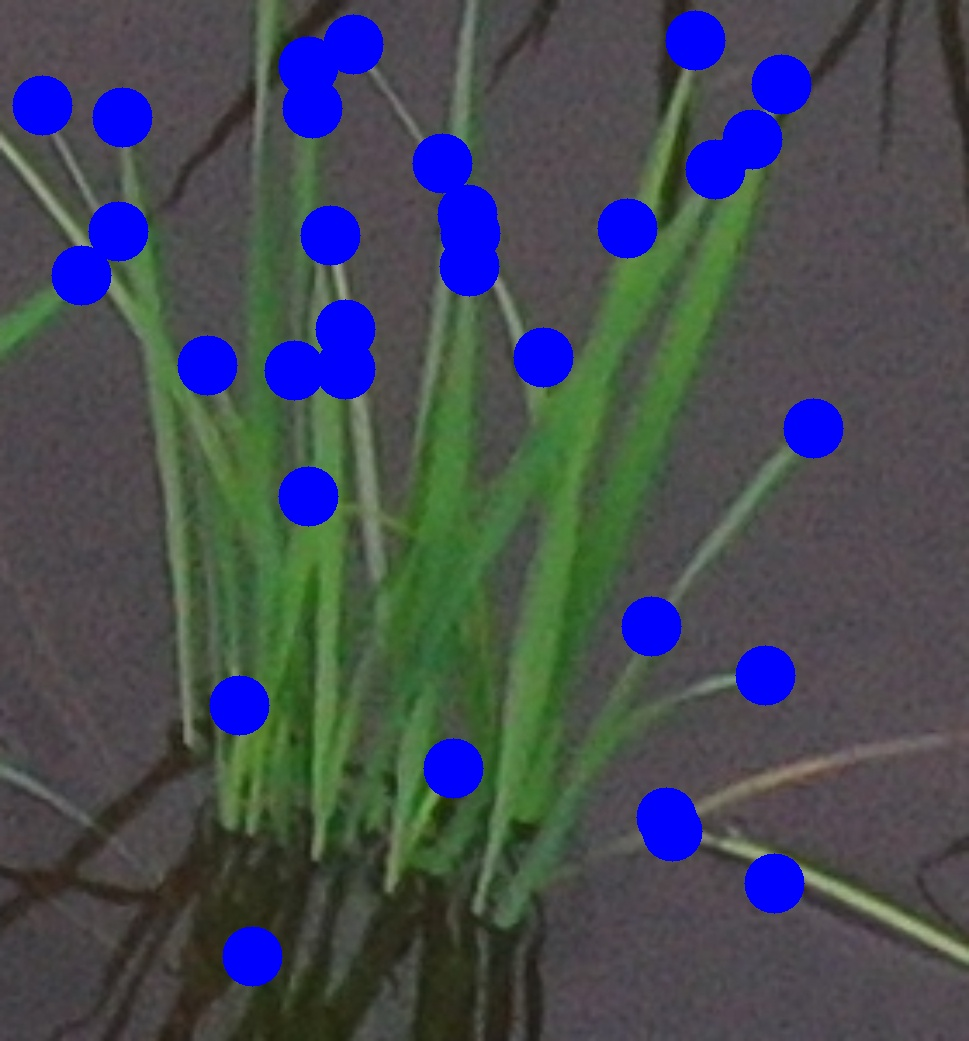

In [ ]:
# サポートパッチのインポート
from google.colab.patches import cv2_imshow

# 画像のインポート
import cv2
img = cv2.imread('/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Output/Integrated/0801_71_PredictionNumber_032_000_000.JPG', cv2.IMREAD_UNCHANGED)
#img = cv2.imread('/content/drive/MyDrive/research/tanashi2022/stemCounting/AnalysisData/inference/Output/Integrated/0714_34_PredictionNumber_747_000_000.JPG', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)